# Aprendizaje Automático - Práctica 3 - Aprendizaje Profundo

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 9 de Junio de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Miguel Ángel Fernández Alonso</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, dos Notebooks de Colab (uno con cada ejercicio). No de debe entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- __El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.__

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'> En esta práctica se pretenden abordar algunos elementos básicos relativos al aprendizaje profundo utilizando Keras (https://keras.io/). Para ello, se emplean dos tareas del ámbito del procesado de imágenes y visión por computador: clasificación de imágenes (_image classification_) y eliminación de ruido en imágenes (_image denoising_). Para tener un conocimiento más profundo de algunas de estas tareas y métodos, así como familiarizarse con modelos más avanzados, se emplaza al estudiantado a cursar Visión por Computador (asignatura de 4º curso).

# <font color='blue'>Ejercicio 1: PROBLEMA DE CLASIFICACIÓN DE IMÁGENES USANDO REDES CONVOLUCIONALES PROFUNDAS Y COMPARACIÓN CON TÉCNICAS CLÁSICAS DE APRENDIZAJE AUTOMÁTICO (7 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación de imágenes. Más concretamente, se enfrentarán al problema de clasificación de imágenes denominado $\textit{MNIST}$ (https://en.wikipedia.org/wiki/MNIST_database), que incluye dígitos manuscritos. Como consecuencia, este conjunto de datos contiene información sobre 10 clases de imágenes (dígitos del $0$ al $9$).

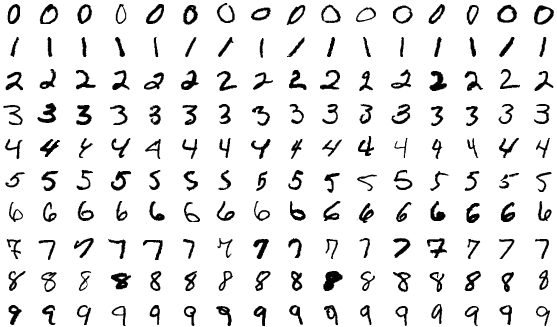



<font color='blue'> Este ejercicio consta de tres apartados:


1.   Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5.
2.   Implementación y experimentación con características HOG y SVMs. Comparación de los resultados proporcionados por esta aproximación clásica con los proporcionados por aprendizaje profundo.
3.   Implementación y experimentación con el modelo profundo que quieran implementar o emplear los estudiantes.



## <font color='blue'> Apartado 1. Implementación y experimentación con una red convolucional sencilla inspirada en LeNet5 (3 puntos)

<font color='blue'> [LeNet5](https://en.wikipedia.org/wiki/LeNet) fue una de las primeras redes convolucionales, y se empleó exitosamente ya en los años 90 en la clasificación de dígitos manuscritos. Véase, por ejemplo, _LeCun et al. (1998). Gradient based learning applied to document recognition. Proceedings of the IEEE. 86(11): 2278-2324_.

<font color='blue'> En este ejercicio emplearemos una versión ligeramente modificada de la misma, que consta de las siguientes capas:

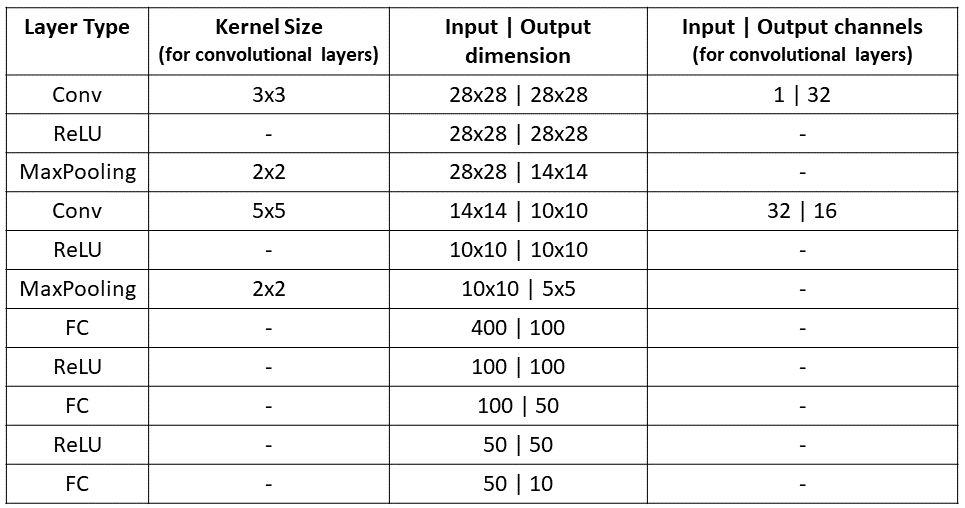

<font color='blue'> A continuación, el alumnado debe implementar en Keras esta arquitectura, y entrenarla y validarla con el conjunto de datos MNIST (ya disponible entre los conjuntos de datos por defecto en Keras: https://keras.io/api/datasets/). A la hora de entrenar modelos profundos es importante acordarse de configurar el cuaderno de modo que se ejecute en GPU (`Editar - Configuración del Cuaderno - Acelerador por Hardware`). De lo contrario, los entrenamientos serán innecesariamente lentos.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Establecer la semilla que vamos a utilizar
np.random.seed(42)

from tensorflow import keras

#import keras
!pip install np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
keras.utils.set_random_seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

# NÚMERO DE CLASES
num_classes = 10


# DIMENSIONES DE ENTRADA DE LAS IMAGENES
img_rows, img_cols = 28, 28

# CARGAMOS LOS DATOS DE ENTRENAMIENTO Y TEST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# FORMATEAMOS Y NORMALIZAMOS LOS DATOS
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Transformamos los vectores de clases en matrices.
# Cada componente se convierte en un vector de ceros
# con un uno en la componente correspondiente a la
# clase a la que pertenece la imagen. Este paso es
# necesario para la clasificación multiclase en keras.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 675.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=bb1e8002de6e1c453029c2c94329c08c6ccee7e00697e0588fd19b00aaf0eda6
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


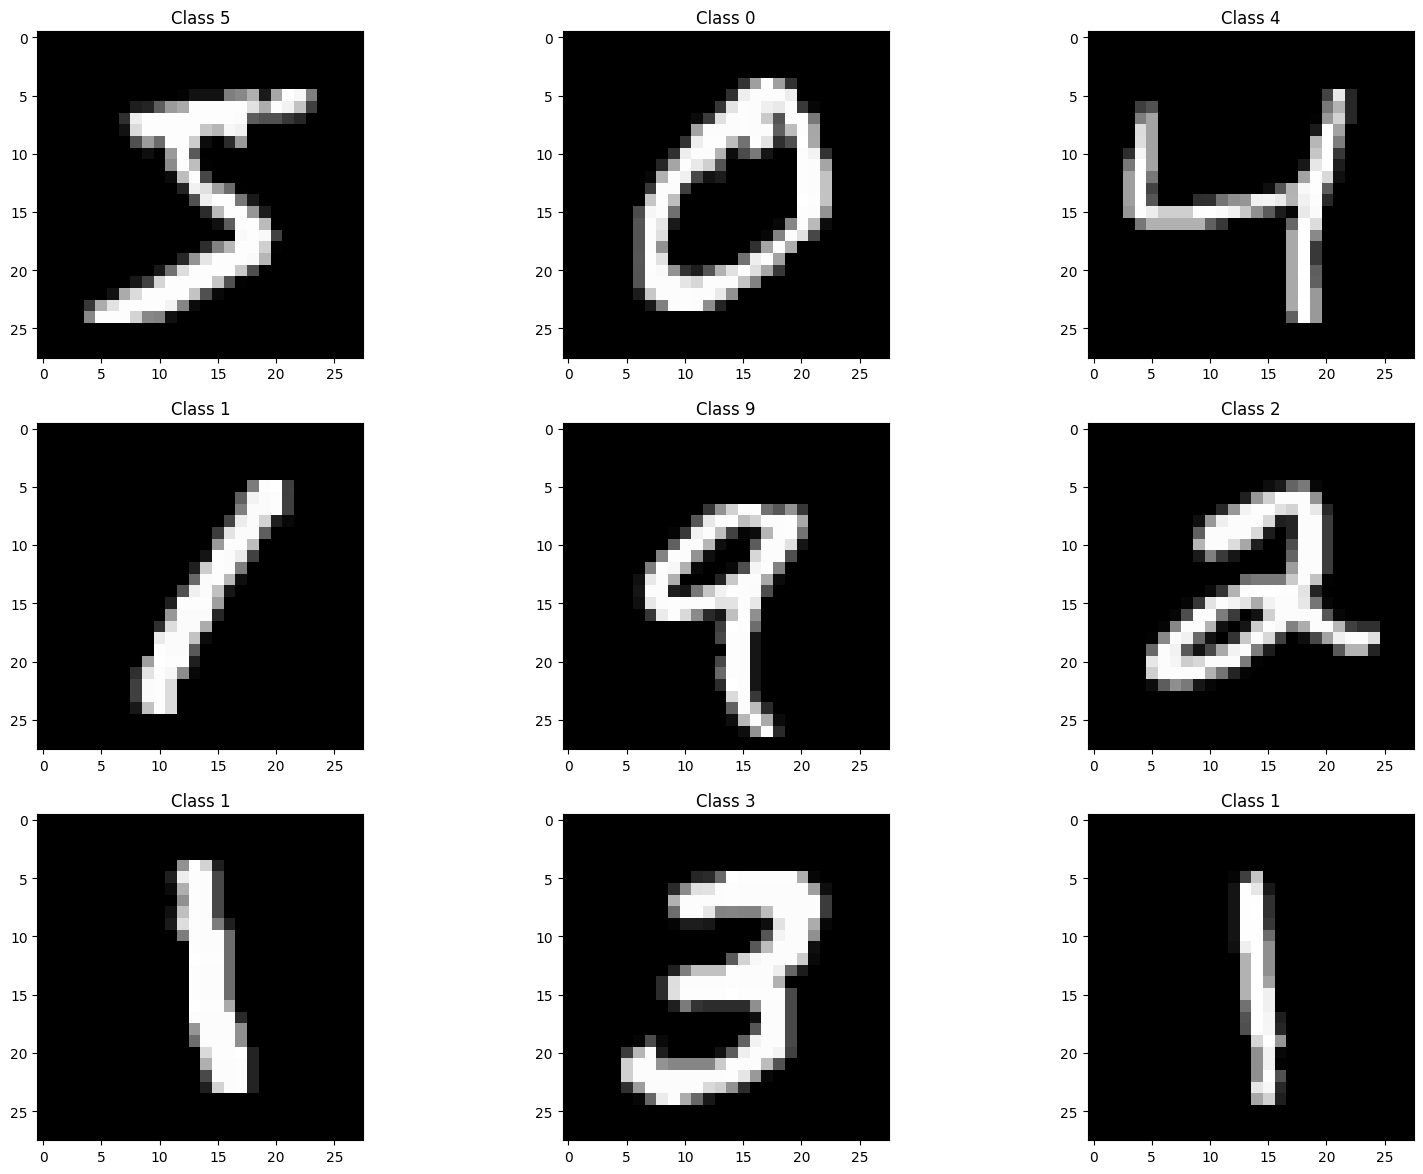

In [ ]:
#VISUALIZAMOS ALGUNAS DE LAS IMÁGENES DEL DATASET
number_images_per_row = 3
result = np.where(y_train == 1)
fig = plt.figure()
for i in range(number_images_per_row*number_images_per_row):
  label = 'Class {}'.format(result[1][i])
  plt.subplot(number_images_per_row,number_images_per_row,i+1).set_title(label)
  plt.imshow(x_train[i].squeeze(), cmap='gray',vmin=0,vmax=1)

fig.set_size_inches(np.array(fig.get_size_inches()) * number_images_per_row)

plt.show()

<font color='blue'> El alumnado debe escoger empíricamente el tamaño de _batch_, el número de épocas y el _learning rate_. Se debe documentar en detalle todo el proceso de entrenamiento y selección de hiperparámetros (incluyendo qué metricas y función de pérdida se emplean y por qué). Se debe emplear _early stopping_ (https://keras.io/api/callbacks/early_stopping/), y los alumnos deben explicar en qué consiste este proceso de regularización. Se puede emplear tanto _hold-out_ como _cross-validation_ como protocolo de validación experimental pero, en cualquier caso, se deben explicar y justificar adecuadamente todas las decisiones tomadas. Se debe dejar un $20\%$ de los datos de entrenamiento para validación. Finalmente, se debe comparar el rendimiento obtenido con dos optimizadores: AdamW y Adadelta.

<font color='blue'> Resulta fundamental realizar un _.summary()_ del modelo creado y demostrar que se comprenden los distintos elementos que allí aparecen: nombre/tipo de capa, dimensiones de salida, y número de parámetros de la red.

In [ ]:
# Esta función pinta dos gráficas, una con la evolución
# de la función de pérdida en el conjunto de train y
# en el de validación, y otra con la evolución de la
# accuracy en el conjunto de train y el de validación.
# Es necesario pasarle como parámetro el historial del
# entrenamiento del modelo (lo que devuelve la
# función fit()).
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()


In [ ]:
# Esta función devuelve la accuracy de un modelo,
# definida como el porcentaje de etiquetas bien predichas
# frente al total de etiquetas. Como parámetros es
# necesario pasarle el vector de etiquetas verdaderas
# y el vector de etiquetas predichas, en el formato de
# keras (matrices donde cada etiqueta ocupa una fila,
# con un 1 en la posición de la clase a la que pertenece y un 0 en las demás).
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy


Data Augmentation
Data augmentation is super important. In terms of Images it means we can increase the number of images our model sees.

This can be acheived by Rotating the Image, Flipping the Image, Zooming the Image, Changing light conditions, Cropping it etc.

Keep in mind doing all these things will not always help the model. For example in our situation a vertical_flip would not be wise as 6's would become 9's and vice-versa.

In [ ]:
datagen = keras.preprocessing.image.ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1, # Randomly zoom image
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)  # randomly flip images

In [ ]:
#A CUBRIR POR EL ALUMNADO
#Construimos el modelo CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(14, 14, 32)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Flatten())
model.add(Dense(units=100, activation='relu', input_dim=400))
model.add(Flatten())
model.add(Dense(units=50, activation='relu', input_dim=100))
model.add(Flatten())
model.add(Dense(units=10, activation='relu', input_dim=50))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 16)        12816     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)              

In [ ]:
#Compilamos el modelo (Configuramos el proceso de aprendizaje)
optimizer = keras.optimizers.AdamW(learning_rate=0.001, beta_1 = 0.9, beta_2=0.999)

In [ ]:
#Compilamos el modelo
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        12816     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)              

Many optimization algorithms have a constant learning rate, which will often not reach a local minima.

To implement Learning Rate Decay we can use either LearningRateScheduler or ReduceLRonPlateau.

LearningRateScheduler - takes the step decay function as argument and returns updated learning rates for use in optimzer at every epoch stage.

ReduceLRonPlateau - monitors a quantity and if no improvement is seen for a 'patience' number of epochs, then the learning rate is reduced by a factor specified manually.

In [ ]:
#Learning Rate Decay
#Usamos LearningRateScheduler
reduce_lr = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

#visualizing what the learning rate decay will do to the learning rate through every epoch

decays = [(lambda x: 1e-3 * 0.9 ** x)(x) for x in range(10)]
i=1

for lr in decays:
    print("Epoch " + str(i) +" Learning Rate: " + str(lr))
    i+=1

Epoch 1 Learning Rate: 0.001
Epoch 2 Learning Rate: 0.0009000000000000001
Epoch 3 Learning Rate: 0.0008100000000000001
Epoch 4 Learning Rate: 0.0007290000000000002
Epoch 5 Learning Rate: 0.0006561000000000001
Epoch 6 Learning Rate: 0.00059049
Epoch 7 Learning Rate: 0.000531441
Epoch 8 Learning Rate: 0.0004782969000000001
Epoch 9 Learning Rate: 0.0004304672100000001
Epoch 10 Learning Rate: 0.0003874204890000001


Early Stopping Rounds
I would still like to define an early stopping parameter to ensure that my model stops training once I have reached a point where it is no longer necessary to continue training. This is another way to control overfitting.

Its important to note that we need to specify a validation dataset in the model to use an early_stopping callback

In [ ]:
#Por defecto esto es evaluado en 'val_loss'

early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001, #mínima cantidad de cambio para que cuente como mejora
    patience=20, #cuántas épocas hemos de esperar antes de la parada
    restore_best_weights=True,
)

Since we have the LearningRateScheduler, if we dont use the early stopping callback in this model we see an improvement from 96.4% to about 96.6% accuracy as we get closer and closer to the local minima.

Fitting the Model

In [ ]:
batch_size = 64
epochs= 50

In [ ]:
#Fit the model
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (x_test, y_test), verbose=1,
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr]) #left out early_stopping parameter as it gets better accuracy

Epoch 1/50
937/937 [==============================] - 22s 23ms/step - loss: nan - accuracy: 0.1680 - val_loss: nan - val_accuracy: 0.0980 - lr: 0.0010
Epoch 2/50
937/937 [==============================] - 21s 22ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980 - lr: 9.0000e-04
Epoch 3/50
937/937 [==============================] - 23s 25ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980 - lr: 8.1000e-04
Epoch 4/50
937/937 [==============================] - 22s 23ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0980 - lr: 7.2900e-04
Epoch 5/50
937/937 [==============================] - 23s 24ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0980 - lr: 6.5610e-04
Epoch 6/50
937/937 [==============================] - 21s 22ms/step - loss: nan - accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0980 - lr: 5.9049e-04
Epoch 7/50
937/937 [==============================] - 22s 23ms/step - loss

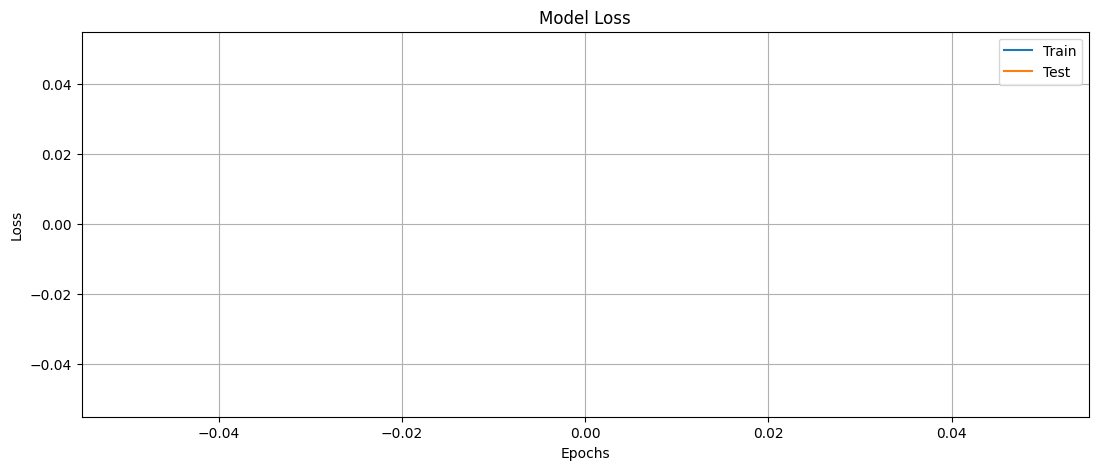

In [ ]:
#Evaluamos el modelo
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.grid()
plt.show()

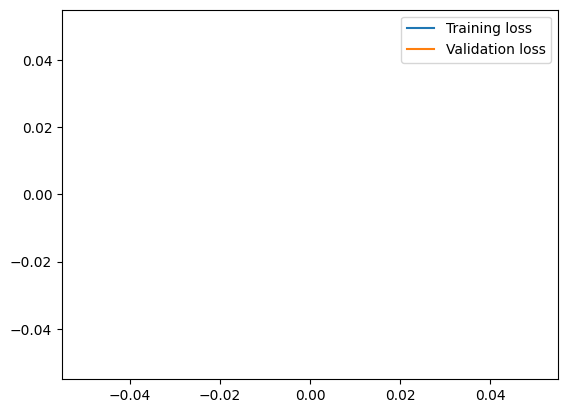

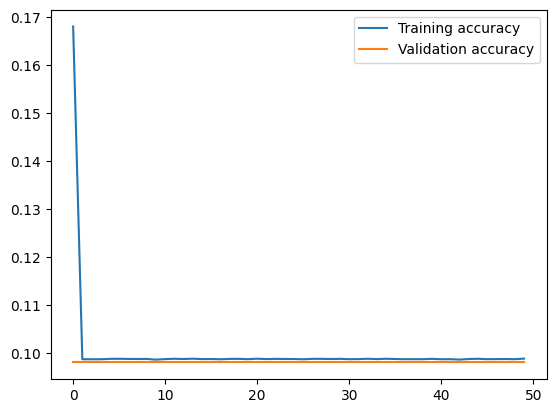

In [ ]:
mostrarEvolucion(history)


Como vemos, el modelo es pésimo teniendo unos resultados de:
accuracy: 0.0988 - val_loss: nan - val_accuracy: 0.0980 - lr: 5.7264e-06

Vamos a cambiarlo para que estos resultados sean mucho mejores

Para eso voy a añadir batch_normalizations, dropouts y más capas convolucionales, vemos como evoluciona el modelo a medida que aumenta su complejidad

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Fitting el ImageDataGenerator definido antes
datagen.fit(x_train)

Construimos ahora el modelo CNN

Pasos:

Add Convolutional Layers - Building blocks of ConvNets and what do the heavy computation

Add Pooling Layers - Steps along image - reduces params and decreases likelihood of overfitting

Add Batch Normalization Layer - Scales down outliers, and forces NN to not relying too much on a Particular Weight

Add Dropout Layer - Regularization Technique that randomly drops a percentage of neurons to avoid overfitting (usually 20% - 50%)

Add Flatten Layer - Flattens the input as a 1D vector

Add Output Layer - Units equals number of classes. Sigmoid for Binary

Classification, Softmax in case of Multi-Class Classification.

Add Dense Layer - Fully connected layer which performs a linear operation on the layer's input

In [ ]:
from keras.layers import BatchNormalization

model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model2.add(Dropout(0.25))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(Dense(1024, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

In [ ]:
#Compilamos el modelo con los optimizadores
optimizer = keras.optimizers.AdamW(learning_rate=0.001, beta_1 = 0.9, beta_2=0.999)
model2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

Learning Rate Decay

In [ ]:
#Learning Rate Decay
#Usamos LearningRateScheduler
reduce_lr = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

#visualizing what the learning rate decay will do to the learning rate through every epoch

decays = [(lambda x: 1e-3 * 0.9 ** x)(x) for x in range(10)]
i=1

for lr in decays:
    print("Epoch " + str(i) +" Learning Rate: " + str(lr))
    i+=1

Epoch 1 Learning Rate: 0.001
Epoch 2 Learning Rate: 0.0009000000000000001
Epoch 3 Learning Rate: 0.0008100000000000001
Epoch 4 Learning Rate: 0.0007290000000000002
Epoch 5 Learning Rate: 0.0006561000000000001
Epoch 6 Learning Rate: 0.00059049
Epoch 7 Learning Rate: 0.000531441
Epoch 8 Learning Rate: 0.0004782969000000001
Epoch 9 Learning Rate: 0.0004304672100000001
Epoch 10 Learning Rate: 0.0003874204890000001


In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001, #mínima cantidad de cambio para que cuente como mejora
    patience=20, #cuántas épocas hemos de esperar antes de la parada
    restore_best_weights=True,
)

In [ ]:
batch_size = 64
epochs = 50

In [ ]:
history = model2.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (x_test, y_test), verbose=1,
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

<ipython-input-38-68c82f389fa4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,


Epoch 1/50
937/937 [==============================] - 34s 28ms/step - loss: 0.3087 - accuracy: 0.9094 - val_loss: 0.0553 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 2/50
937/937 [==============================] - 26s 28ms/step - loss: 0.1100 - accuracy: 0.9675 - val_loss: 0.0437 - val_accuracy: 0.9859 - lr: 9.0000e-04
Epoch 3/50
937/937 [==============================] - 26s 28ms/step - loss: 0.0828 - accuracy: 0.9749 - val_loss: 0.0286 - val_accuracy: 0.9911 - lr: 8.1000e-04
Epoch 4/50
937/937 [==============================] - 26s 28ms/step - loss: 0.0698 - accuracy: 0.9790 - val_loss: 0.0246 - val_accuracy: 0.9917 - lr: 7.2900e-04
Epoch 5/50
937/937 [==============================] - 25s 27ms/step - loss: 0.0606 - accuracy: 0.9814 - val_loss: 0.0251 - val_accuracy: 0.9928 - lr: 6.5610e-04
Epoch 6/50
937/937 [==============================] - 25s 27ms/step - loss: 0.0562 - accuracy: 0.9838 - val_loss: 0.0258 - val_accuracy: 0.9920 - lr: 5.9049e-04
Epoch 7/50
937/937 [==================

Como podemos ver el modelo ha mejorado de forma drástica al incluir más capas, pasando a un accuracy de 0.996 y un val_accuracy de 0.9964

Precisión y Pérdida:
La precisión del modelo en el conjunto de entrenamiento alcanzó aproximadamente el 99.64% al finalizar las 50 épocas. Esto indica una capacidad casi perfecta del modelo para clasificar correctamente las imágenes de entrenamiento.
La pérdida en el conjunto de entrenamiento fue extremadamente baja, con un valor de alrededor de 0.0114 al finalizar las 50 épocas. Esto indica que el modelo ha ajustado bien sus pesos para minimizar la discrepancia entre las predicciones y las etiquetas verdaderas durante el entrenamiento.
Validación:
La precisión en el conjunto de validación también fue extremadamente alta, alcanzando alrededor del 99.64% al finalizar las 50 épocas. Esta alta precisión en el conjunto de validación sugiere que el modelo generaliza bien y tiene una excelente capacidad para hacer predicciones precisas en datos no vistos.
La pérdida en el conjunto de validación fue igualmente baja, con un valor de alrededor de 0.0100 al finalizar las 50 épocas. Esto confirma la capacidad del modelo para generalizar bien y ajustarse adecuadamente a los datos de validación.
Tasa de Aprendizaje (lr):
Al igual que con el caso anterior, la tasa de aprendizaje se redujo durante el entrenamiento a medida que se completaban las épocas. Esto es típico en el optimizador AdamW, donde la tasa de aprendizaje se ajusta automáticamente según la progresión del entrenamiento.
Análisis General:
Los resultados indican que el modelo entrenado con el optimizador AdamW ha aprendido eficazmente las características de los datos y ha logrado un rendimiento excepcional tanto en los datos de entrenamiento como en los de validación.
Dado el alto nivel de precisión y la baja pérdida tanto en el conjunto de entrenamiento como en el de validación, este modelo es muy efectivo para clasificar nuevas instancias de datos con una precisión muy alta.

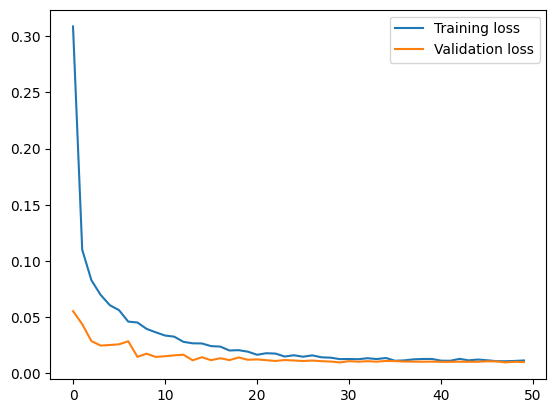

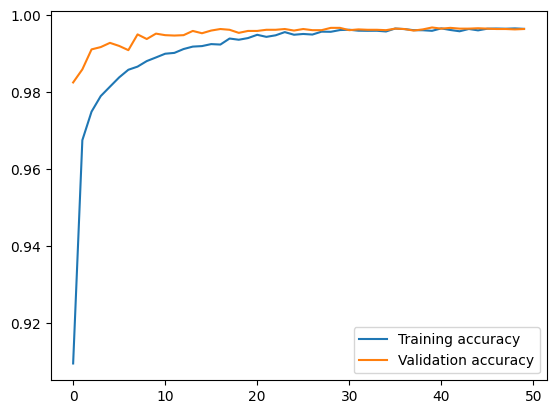

In [ ]:
mostrarEvolucion(history)

La proximidad entre las curvas de training accuracy y validation accuracy puede sugerir que el modelo no está experimentando un sobreajuste significativo.

Probamos ahora con el optimizador Adadelta, con AdamW hemos obtenido un resultado de 0.996 de accuracy.

El procedimiento es el mismo, usamos el mismo modelo solo que cambiando el optimizador.

In [ ]:
#Probamos ahora con Adadelta como optimizer

#Compilamos el modelo con los optimizadores
optimizer = keras.optimizers.Adadelta(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_13 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

In [ ]:
history = model2.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (x_test, y_test), verbose=1,
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/50


<ipython-input-56-367e7c34d917>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,


937/937 [==============================] - 35s 31ms/step - loss: 3.5086 - accuracy: 0.1241 - val_loss: 2.0390 - val_accuracy: 0.2989 - lr: 0.0010
Epoch 2/50
937/937 [==============================] - 26s 28ms/step - loss: 3.0915 - accuracy: 0.1778 - val_loss: 1.6196 - val_accuracy: 0.4515 - lr: 9.0000e-04
Epoch 3/50
937/937 [==============================] - 28s 29ms/step - loss: 2.8059 - accuracy: 0.2302 - val_loss: 1.3644 - val_accuracy: 0.5296 - lr: 8.1000e-04
Epoch 4/50
937/937 [==============================] - 26s 28ms/step - loss: 2.5932 - accuracy: 0.2710 - val_loss: 1.1901 - val_accuracy: 0.5875 - lr: 7.2900e-04
Epoch 5/50
937/937 [==============================] - 26s 28ms/step - loss: 2.4255 - accuracy: 0.3046 - val_loss: 1.0633 - val_accuracy: 0.6311 - lr: 6.5610e-04
Epoch 6/50
937/937 [==============================] - 26s 28ms/step - loss: 2.3037 - accuracy: 0.3338 - val_loss: 0.9663 - val_accuracy: 0.6669 - lr: 5.9049e-04
Epoch 7/50
937/937 [=============================

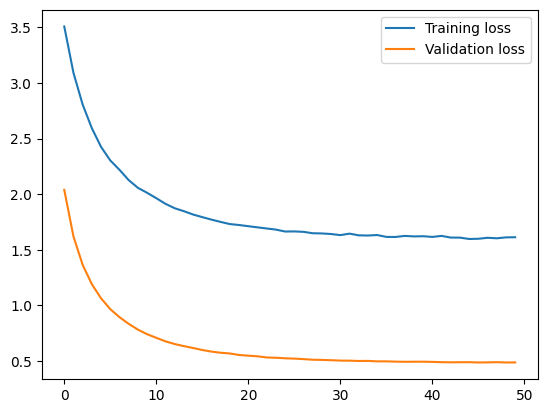

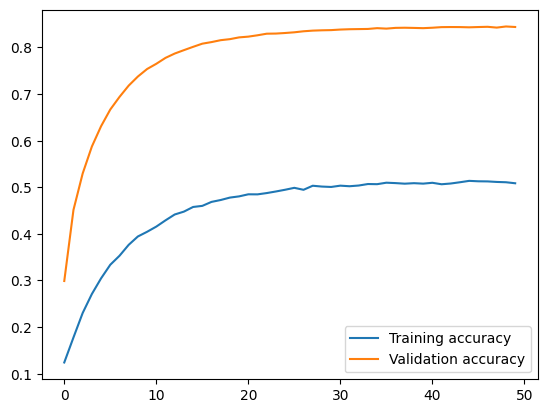

In [ ]:
mostrarEvolucion(history)

Aquí si estamos haciendo overfitting, ambas gráficas estan muy separadas. El overfittin puede ser dado por diversas situaciones aún así:


Sobreajuste: El modelo puede estar aprendiendo demasiado bien los detalles específicos de los datos de entrenamiento y no generalizando bien a datos nuevos. Esto puede deberse a la capacidad excesiva del modelo o a la falta de regularización.

Falta de datos: Si el conjunto de datos de entrenamiento es pequeño en comparación con la complejidad del modelo, es posible que el modelo aprenda demasiado bien los ejemplos específicos del conjunto de entrenamiento sin generalizar bien a datos nuevos.

Selección incorrecta de modelo: El modelo puede ser demasiado complejo para los datos disponibles. En este caso, es posible que se requiera una reducción en la complejidad del modelo o el uso de técnicas de regularización para evitar el sobreajuste.

Sesgo de datos: Si hay diferencias sistemáticas entre los datos de entrenamiento y validación, como una distribución diferente o características distintas, esto puede llevar a diferencias en las métricas de rendimiento entre los dos conjuntos.

Problemas de preprocesamiento: Problemas en la etapa de preprocesamiento de los datos, como una normalización incorrecta o una codificación de características inadecuada, pueden afectar la generalización del modelo.

El análisis del modelo utilizando el algoritmo de optimización Adadelta muestra un progreso considerable en la precisión y la pérdida a lo largo de las épocas de entrenamiento.

Precisión y Pérdida:
La precisión del modelo en el conjunto de entrenamiento aumentó de aproximadamente 50.86% al comienzo del entrenamiento a alrededor de 84.40% al finalizar las 50 épocas. Esto indica una mejora significativa en la capacidad del modelo para clasificar correctamente las imágenes de entrenamiento a medida que se realizan más iteraciones.
La pérdida en el conjunto de entrenamiento disminuyó de aproximadamente 1.6129 al inicio del entrenamiento a alrededor de 0.4868 al finalizar las 50 épocas. Esta disminución en la pérdida indica que el modelo ha mejorado en su capacidad para minimizar la discrepancia entre las predicciones y las etiquetas verdaderas durante el entrenamiento.
Validación:
La precisión en el conjunto de validación alcanzó aproximadamente el 84.40% al finalizar las 50 épocas. Esta métrica es importante porque indica la capacidad del modelo para generalizar a datos no vistos, es decir, datos que no se utilizaron durante el entrenamiento.
La pérdida en el conjunto de validación es de alrededor de 0.4868, lo que indica que el modelo generaliza bien y tiene una buena capacidad para hacer predicciones precisas en datos no vistos.
Tasa de Aprendizaje (lr):
La tasa de aprendizaje se redujo durante el entrenamiento a medida que se completaban las épocas. Esto es típico en algoritmos de optimización adaptativos como Adadelta, donde la tasa de aprendizaje se ajusta automáticamente según la progresión del entrenamiento.
Análisis General:
Los resultados sugieren que el modelo ha aprendido patrones significativos en los datos de entrenamiento y es capaz de generalizar bien a datos nuevos.
Sin embargo, siempre es útil considerar la posibilidad de ajustar los hiperparámetros del modelo o probar diferentes algoritmos de optimización para obtener posibles mejoras adicionales en el rendimiento del modelo.

## <font color='blue'> Apartado 2. Implementación y experimentación con técnicas clásicas (características HOG y SVMs) (2 puntos)

<font color='blue'> Ahora vamos a emplear SVM y características de HOG para clasificar estas imágenes. Se debe describir todo el proceso de ajuste realizado, incluyendo la selección de hiperparámetros, y se deben discutir las ventajas y desventajas de esta aproximación en comparación con el uso de _deep learning_, así como los resultados obtenidos y la calidad de las características empleadas.

In [ ]:
from skimage.feature import hog

fd = hog(x_train[0], orientations=4, pixels_per_cell=(10,10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

x_train_HOG = np.zeros((x_train.shape[0],len(fd)), np.float32)
x_test_HOG = np.zeros((x_test.shape[0],len(fd)), np.float32)

for i in range(x_train.shape[0]):
  x_train_HOG[i] = hog(x_train[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)
for i in range(x_test.shape[0]):
  x_test_HOG[i] = hog(x_test[i], orientations=4, pixels_per_cell=(10, 10), cells_per_block=(2, 2), visualize=False, channel_axis=-1)

In [ ]:
print(x_train_HOG.shape)

(60000, 16)


Las SVM son modelos supervisados de aprendizaje automático que se utilizan para clasificación y regresión. En este caso, utilizamos SVM para clasificar las imágenes basadas en las características HOG extraídas. Procedemos a la selección y ajuste de hiperparámetros utilizando validación cruzada.

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [ ]:
#Entrenamiento del SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Convertir etiquetas one-hot a etiquetas de clase
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

#Definimos el modelo SVM
model3 = svm.SVC()

#Definimos la búsqueda de hiperparámetros
param_grid = {
    'C' : [0.1, 1, 10],
    'gamma' : [0.1, 0.01],
    'kernel' : ['rbf', 'linear']
}

#Configuramos la búsqueda de hiperparámetros usando GridSearchCV
grid = GridSearchCV(model3, param_grid, refit=True, verbose=2, cv=5)

#Entrenamos el modelo usando las características HOG del conjunto de entrenamiento
grid.fit(x_train_HOG, y_train_classes)

#Obtenemos las mejores configuraciones de hiperparámetros
print("Mejores hiperparámetros:", grid.best_params_)

#Evaluamos el modelo en el conjunto de prueba
y_pred = grid.predict(x_test_HOG)
print(classification_report(y_test_classes, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.7min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.7min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.7min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.8min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 2.8min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.3min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.2min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.3min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.3min
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time= 1.2min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 6.1min
[CV] END ......................C=0.1, gamma=0.01

Precision:
La precisión representa la proporción de instancias clasificadas como positivas que son realmente positivas. En otras palabras, indica cuántas de las predicciones positivas son verdaderamente correctas.
En este caso, la precisión varía entre 0.67 y 0.97 para las diferentes clases. Esto significa que, por ejemplo, para la clase 1 (automóviles), el 97% de las instancias clasificadas como automóviles fueron clasificadas correctamente.
Recall:
El recall (o sensibilidad) representa la proporción de instancias positivas que fueron correctamente clasificadas por el modelo. Es la capacidad del clasificador para encontrar todas las instancias positivas.
Los valores de recall varían entre 0.66 y 0.98. Por ejemplo, para la clase 1 (automóviles), el modelo identificó correctamente el 98% de todas las instancias de automóviles en el conjunto de datos.
F1-Score:
El F1-score es la media armónica de precision y recall. Proporciona un balance entre precision y recall y es útil cuando las clases están desbalanceadas.
Los valores de F1-score oscilan entre 0.66 y 0.97. Un valor más alto indica un mejor equilibrio entre precision y recall.
Accuracy:
La precisión global del modelo es del 82%, lo que indica la proporción de instancias clasificadas correctamente en todo el conjunto de datos.
Aunque la precisión es razonablemente alta, debemos considerar que el conjunto de datos CIFAR-10 puede ser desafiante debido a la complejidad de las imágenes y la presencia de clases desbalanceadas.
Análisis General:
La métrica macro avg y weighted avg proporcionan promedios de precision, recall y F1-score para todas las clases.
En general, los resultados muestran un rendimiento sólido del modelo SVM con características HOG en la clasificación de las imágenes de CIFAR-10.
Sin embargo, también es importante tener en cuenta que estos resultados pueden variar según la configuración específica del modelo SVM y los hiperparámetros utilizados. Experimentar con diferentes configuraciones podría mejorar aún más el rendimiento del modelo.

## <font color='blue'> Apartado 3. Implementación y experimentación con uno o más modelos escogidos o diseñados por los estudiantes (2 puntos)

<font color='blue'> En este apartado, los alumnos deben diseñar su propia red neuronal para intentar mejorar los resultados obtenidos hasta el momento. Por ejemplo, se puede incrementar la profundidad de la red, el número o tamaño de los filtros convolucionales a aprender, se puede optar por emplear técnicas de regularización como Dropout o Batch Normalization, estrategias de _data augmentation_ o inicialización de pesos, etc. Queda a su elección la estrategia a seguir aunque, en cualquier caso, se valorará la complejidad de la propuesta realizada así como la calidad de la documentación aportada.

<font color='blue'> Del mismo modo, los estudiantes también pueden incluir una comparativa con el rendimiento de alguna otra técnica clásica de su elección (como Random Forest o Gradient Boosting) junto con vectores de características de su elección (incluyendo la modificación de los hiperparámetros del extractor de HOG usado en el apartado anterior, para lo cual será necesario que los alumnos revisen la documentación al respecto).

<font color='blue'> Dentro de este tercer apartado, en caso de que se haya saturado el rendimiento en MNIST (en el sentido de obtener una _accuracy_ en validación superior al $98\%$), se debe emplear como conjunto de datos $\textit{CIFAR-10}$ (https://archive.ics.uci.edu/dataset/691/cifar+10 y https://www.cs.toronto.edu/~kriz/cifar.html). Este conjunto de datos contiene información sobre 10 clases de imágenes diferentes, y también está incluido directamente en Keras (https://keras.io/api/datasets/):

```
# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']
```

In [ ]:
!pip install tensorflow keras


In [69]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [ ]:
# Cargar el conjunto de datos CIFAR-10
cifar10 = tf.keras.datasets.cifar10

# Dividir los datos en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Clases en CIFAR-10
class_names = ['Avión', 'Coche', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

<ipython-input-63-8be86196041f>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


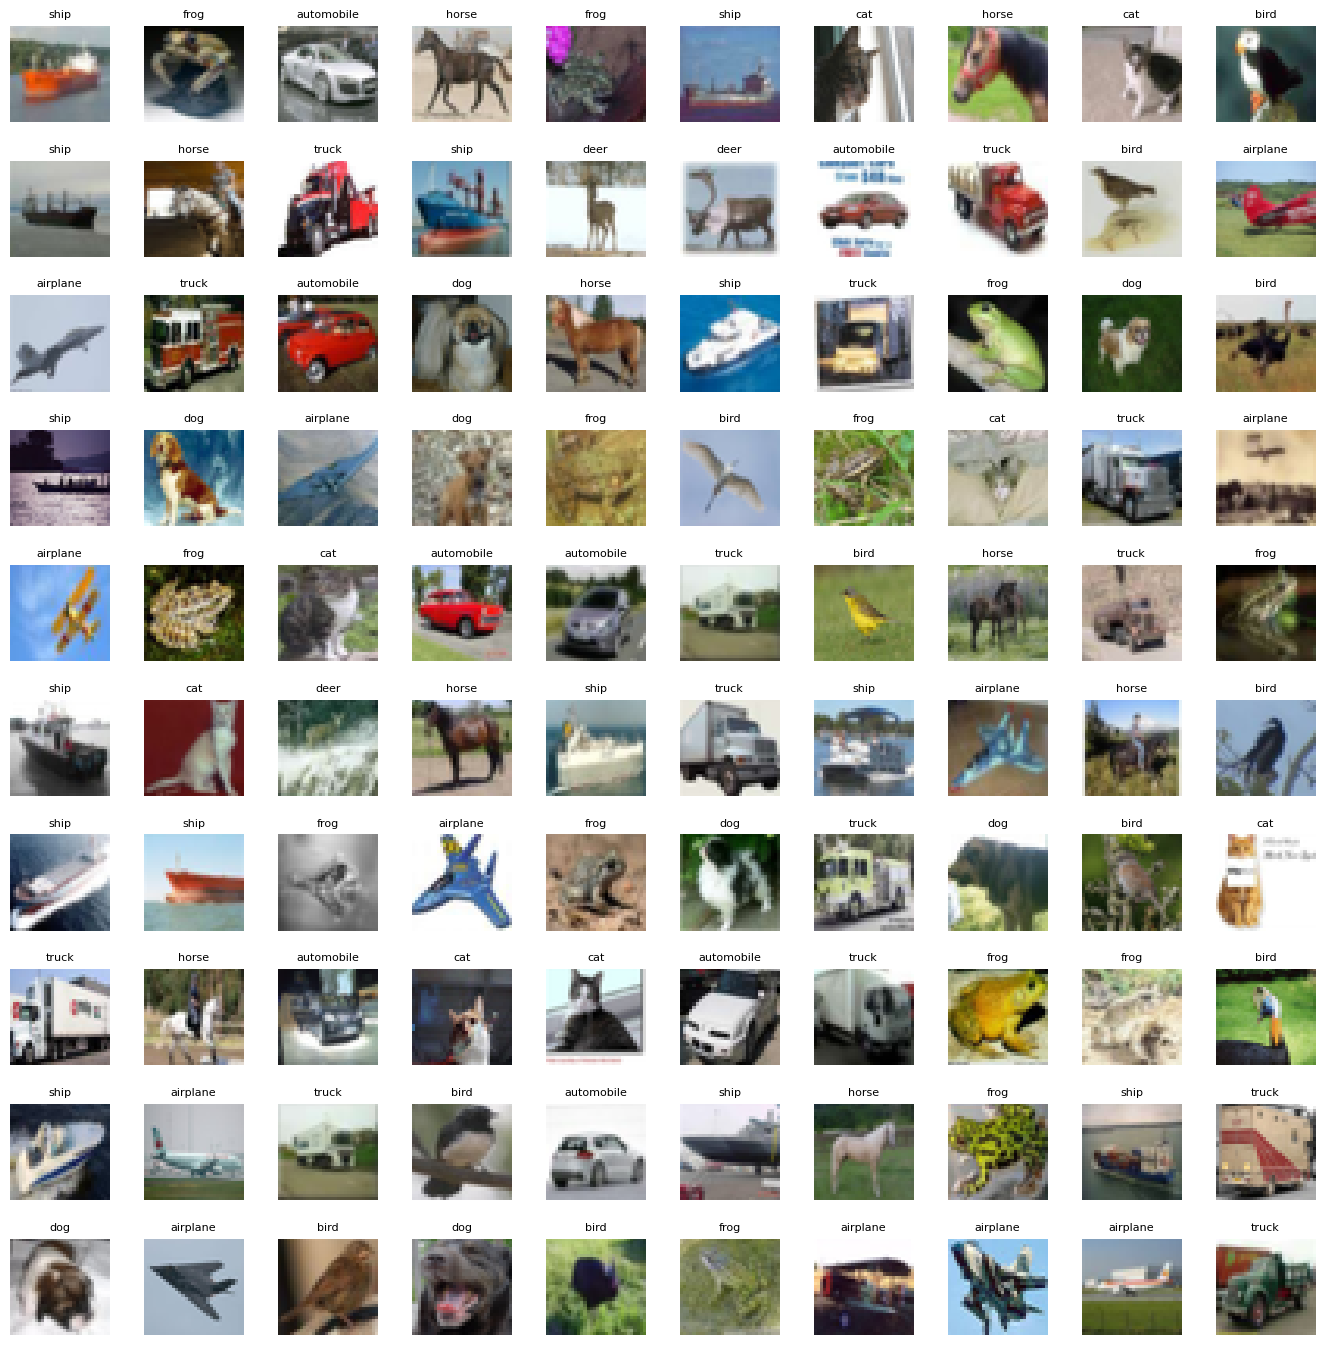

In [63]:
# Let's view more images in a grid format

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

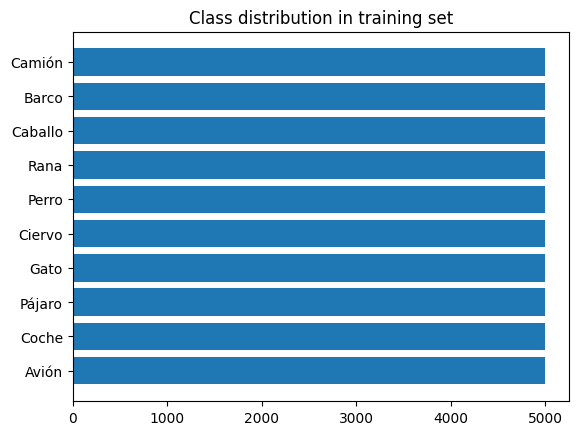

In [66]:
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

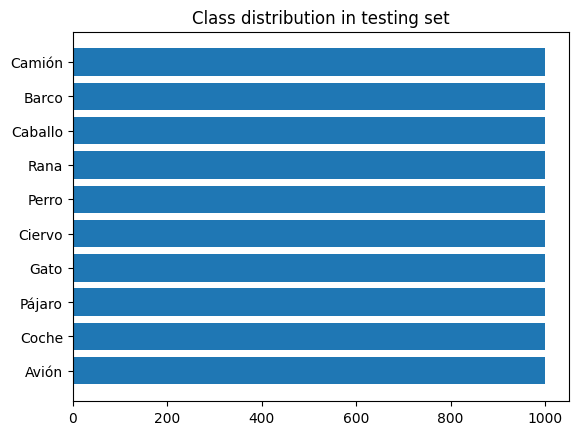

In [67]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

In [ ]:
# A CUBRIR POR EL ALUMNADO
#Normalizar inputs de 0-255 a 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0



In [ ]:
#One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
#Creamos el modelo
# Create the model
# Crear el modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:
#Compilamos el modelo
from tensorflow.keras.optimizers import SGD, schedules
epochs = 25
initial_lrate = 0.01
lr_schedule = schedules.ExponentialDecay(
    initial_learning_rate=initial_lrate,
    decay_steps=epochs * (x_train.shape[0] // 64),
    decay_rate=0.96,
    staircase=True
)

sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [ ]:
#Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=32)


Epoch 1/25
1563/1563 [==============================] - 21s 10ms/step - loss: 1.8402 - accuracy: 0.3194 - val_loss: 1.4601 - val_accuracy: 0.4622
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4130 - accuracy: 0.4858 - val_loss: 1.2609 - val_accuracy: 0.5414
Epoch 3/25
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2043 - accuracy: 0.5683 - val_loss: 1.1302 - val_accuracy: 0.5923
Epoch 4/25
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0375 - accuracy: 0.6285 - val_loss: 0.9200 - val_accuracy: 0.6725
Epoch 5/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9242 - accuracy: 0.6721 - val_loss: 0.8478 - val_accuracy: 0.7061
Epoch 6/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8375 - accuracy: 0.7071 - val_loss: 0.8154 - val_accuracy: 0.7091
Epoch 7/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7744 - accuracy: 0.7298 - val_loss: 0.7516 - val_a

In [ ]:
#Evaluación final del modelo
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.36%


Precisión y Pérdida:
La precisión del modelo en el conjunto de entrenamiento es del 82.94%. Esto significa que el modelo clasifica correctamente aproximadamente el 82.94% de las imágenes en el conjunto de entrenamiento.
La precisión en el conjunto de validación es del 75.36%. Esta métrica indica que el modelo clasifica correctamente alrededor del 75.36% de las imágenes en el conjunto de validación.
Pérdida:
La pérdida en el conjunto de entrenamiento es de aproximadamente 0.5035. Esta métrica indica el valor promedio de la función de pérdida en el conjunto de entrenamiento.
La pérdida en el conjunto de validación es de aproximadamente 0.7458. Esta métrica indica el valor promedio de la función de pérdida en el conjunto de validación.
Análisis General:
Los resultados muestran que el modelo ha aprendido de manera efectiva las características de los datos de entrenamiento y es capaz de generalizar bien a datos no vistos en el conjunto de validación.
Sin embargo, hay una diferencia notable entre la precisión en el conjunto de entrenamiento y en el de validación, lo que puede indicar cierto grado de sobreajuste del modelo a los datos de entrenamiento.
Se podría considerar ajustar los hiperparámetros del modelo, como la tasa de aprendizaje, el tamaño del lote, el número de épocas, etc., para intentar mejorar la precisión en el conjunto de validación y reducir la brecha entre las métricas de entrenamiento y validación.

Probamos con otro modelo para ver los resultados obtenidos

In [71]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [72]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_22 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_23 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                      

In [73]:
#Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [74]:
#Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Data Augmentations
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_cat_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [78]:
r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_cat_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50
1562/1562 [==============================] - 50s 26ms/step - loss: 1.6451 - accuracy: 0.3998 - precision: 0.6167 - recall: 0.1879 - val_loss: 1.5997 - val_accuracy: 0.4510 - val_precision: 0.5925 - val_recall: 0.3378
Epoch 2/50
1562/1562 [==============================] - 43s 28ms/step - loss: 1.2425 - accuracy: 0.5600 - precision: 0.7258 - recall: 0.3915 - val_loss: 1.2741 - val_accuracy: 0.5550 - val_precision: 0.6660 - val_recall: 0.4478
Epoch 3/50
1562/1562 [==============================] - 41s 26ms/step - loss: 1.0371 - accuracy: 0.6383 - precision: 0.7732 - recall: 0.5073 - val_loss: 0.9446 - val_accuracy: 0.6785 - val_precision: 0.7715 - val_recall: 0.5890
Epoch 4/50
1562/1562 [==============================] - 40s 25ms/step - loss: 0.9338 - accuracy: 0.6808 - precision: 0.7982 - recall: 0.5678 - val_loss: 0.8219 - val_accuracy: 0.7181 - val_precision: 0.8127 - val_recall: 0.6229
Epoch 5/50
1562/1562 [==============================] - 40s 26ms/step - loss: 0.8565 - a

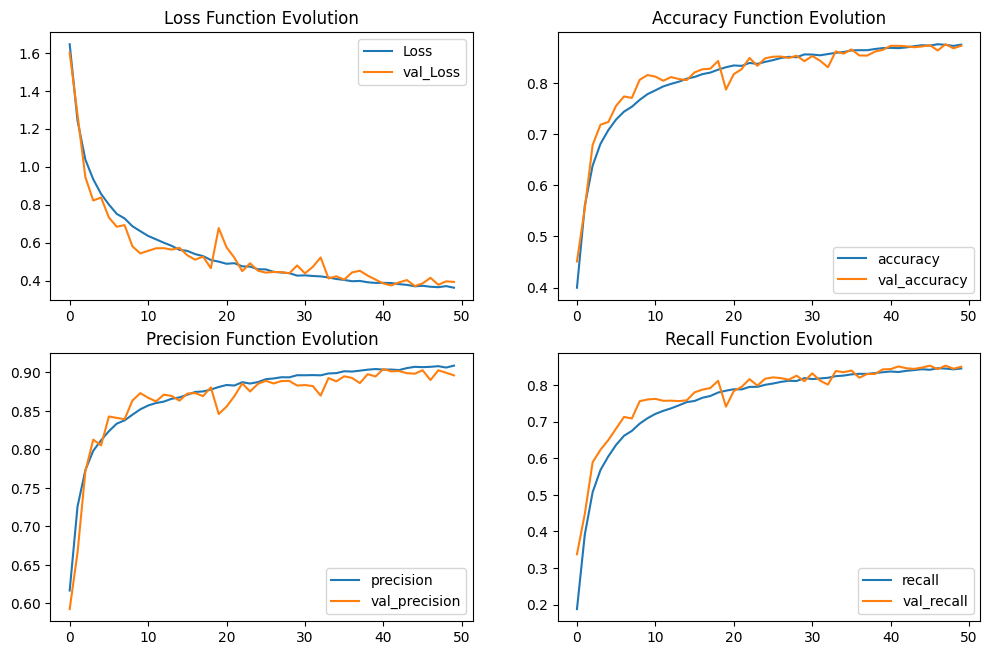

In [79]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

Precisión y Pérdida:
La precisión del modelo en el conjunto de entrenamiento es del 87.44%. Esto indica que el modelo clasifica correctamente aproximadamente el 87.44% de las imágenes en el conjunto de entrenamiento.
La precisión en el conjunto de validación es del 87.23%. Esta métrica indica que el modelo clasifica correctamente alrededor del 87.23% de las imágenes en el conjunto de validación.
Pérdida:
La pérdida en el conjunto de entrenamiento es de aproximadamente 0.3621. Esto indica el valor promedio de la función de pérdida en el conjunto de entrenamiento.
La pérdida en el conjunto de validación es de aproximadamente 0.3927. Esto indica el valor promedio de la función de pérdida en el conjunto de validación.
Precisión y Recall:
Además de la precisión, se proporcionan las métricas de precisión y recall para evaluar el rendimiento del modelo en términos de su capacidad para identificar correctamente las clases positivas y evitar falsos positivos.
En el conjunto de entrenamiento, la precisión es del 90.88% y el recall es del 84.50%. Esto significa que el modelo tiene una alta precisión en la predicción de las clases positivas y también puede recuperar correctamente una alta proporción de instancias positivas.
En el conjunto de validación, la precisión es del 89.61% y el recall es del 84.98%. Estas métricas indican un rendimiento similar al del conjunto de entrenamiento, lo que sugiere que el modelo generaliza bien y mantiene su rendimiento en datos no vistos.
Análisis General:
Los resultados muestran que este segundo modelo tiene un rendimiento sólido en el conjunto de datos CIFAR-10, con una precisión y recall decentes tanto en el conjunto de entrenamiento como en el de validación.
La brecha entre la precisión en el conjunto de entrenamiento y el conjunto de validación es mínima, lo que sugiere que el modelo generaliza bien y no está sobreajustado a los datos de entrenamiento.

313/313 [==============================] - 3s 8ms/step - loss: 0.3927 - accuracy: 0.8723 - precision: 0.8961 - recall: 0.8498
Test Accuracy : 87.23%
313/313 [==============================] - 2s 5ms/step


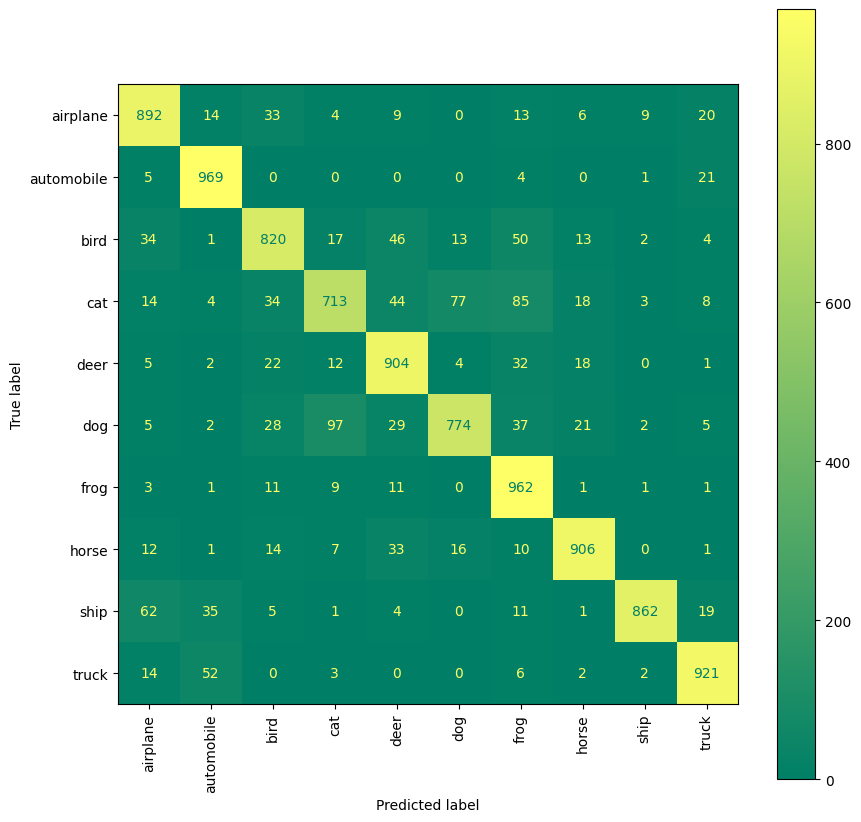

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

evaluation = model.evaluate(x_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.90      0.97      0.93      1000
           2       0.85      0.82      0.83      1000
           3       0.83      0.71      0.77      1000
           4       0.84      0.90      0.87      1000
           5       0.88      0.77      0.82      1000
           6       0.80      0.96      0.87      1000
           7       0.92      0.91      0.91      1000
           8       0.98      0.86      0.92      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Precisión:
La precisión representa la proporción de instancias clasificadas correctamente como positivas (verdaderos positivos) respecto al número total de instancias clasificadas como positivas (verdaderos positivos más falsos positivos).
En promedio, la precisión del modelo es del 87%, lo que indica que el modelo clasifica correctamente aproximadamente el 87% de las instancias en el conjunto de datos de prueba.
Recall:
El recall, también conocido como sensibilidad, representa la proporción de instancias positivas correctamente identificadas respecto al número total de instancias positivas en el conjunto de datos.
El modelo tiene un recall promedio del 87%, lo que significa que es capaz de recuperar correctamente aproximadamente el 87% de las instancias positivas en el conjunto de datos de prueba.
F1-Score:
El F1-score es la media armónica de precisión y recall, y proporciona una medida equilibrada del rendimiento del modelo.
El F1-score promedio del modelo es del 87%, lo que indica un buen equilibrio entre precisión y recall en general.
Análisis por Clase:
En cada clase individualmente, el modelo muestra un rendimiento variado en términos de precisión, recall y F1-score.
Algunas clases tienen un rendimiento excepcionalmente alto, como las clases 1, 4, 7, 8 y 9, con precisiones y recalls superiores al 90%.
Otras clases, como las clases 3 y 5, muestran un rendimiento relativamente más bajo en términos de recall, lo que sugiere que el modelo tiene dificultades para identificar correctamente instancias de esas clases.
Conclusiones:
En general, el modelo muestra un buen rendimiento en la clasificación de imágenes en el conjunto de datos CIFAR-10, con una precisión y recall promedio del 87%.
Sin embargo, hay variaciones en el rendimiento entre las diferentes clases, lo que sugiere que el modelo puede ser más efectivo en la clasificación de algunas clases que en otras.

Testeamos con una imagen

Image 100 is [4]


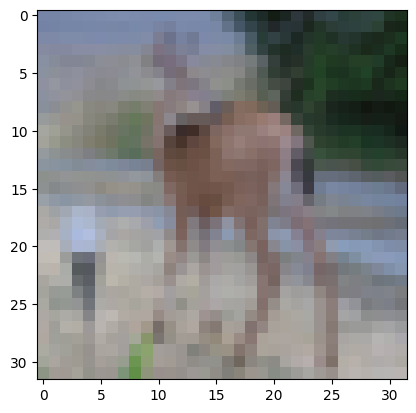

In [84]:
my_image = x_test[100]
plt.imshow(my_image)

#Es un reno
print(f"Image 100 is {y_test[100]}")

In [85]:
# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

1/1 [==============================] - 1s 547ms/step
The model predict that image 100 is 4


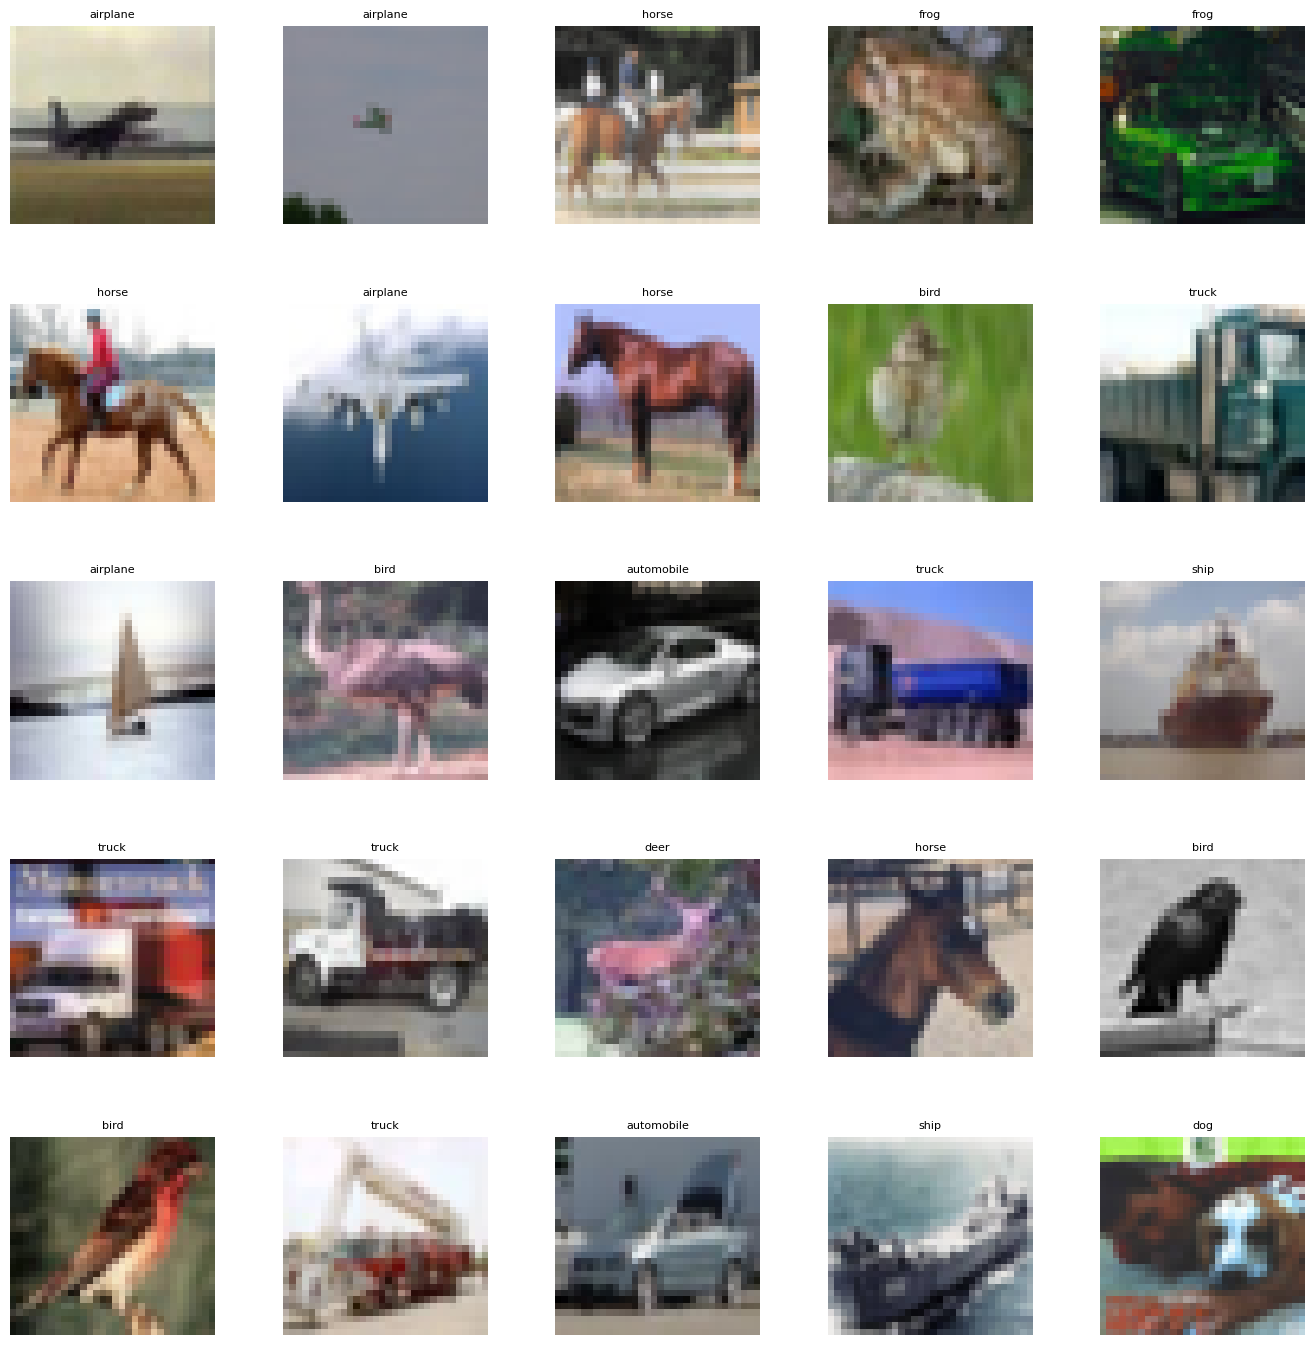

In [87]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(x_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index
    axes[i].imshow(x_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [88]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 1s 4ms/step


<ipython-input-88-83eb910e855a>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
<ipython-input-88-83eb910e855a>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


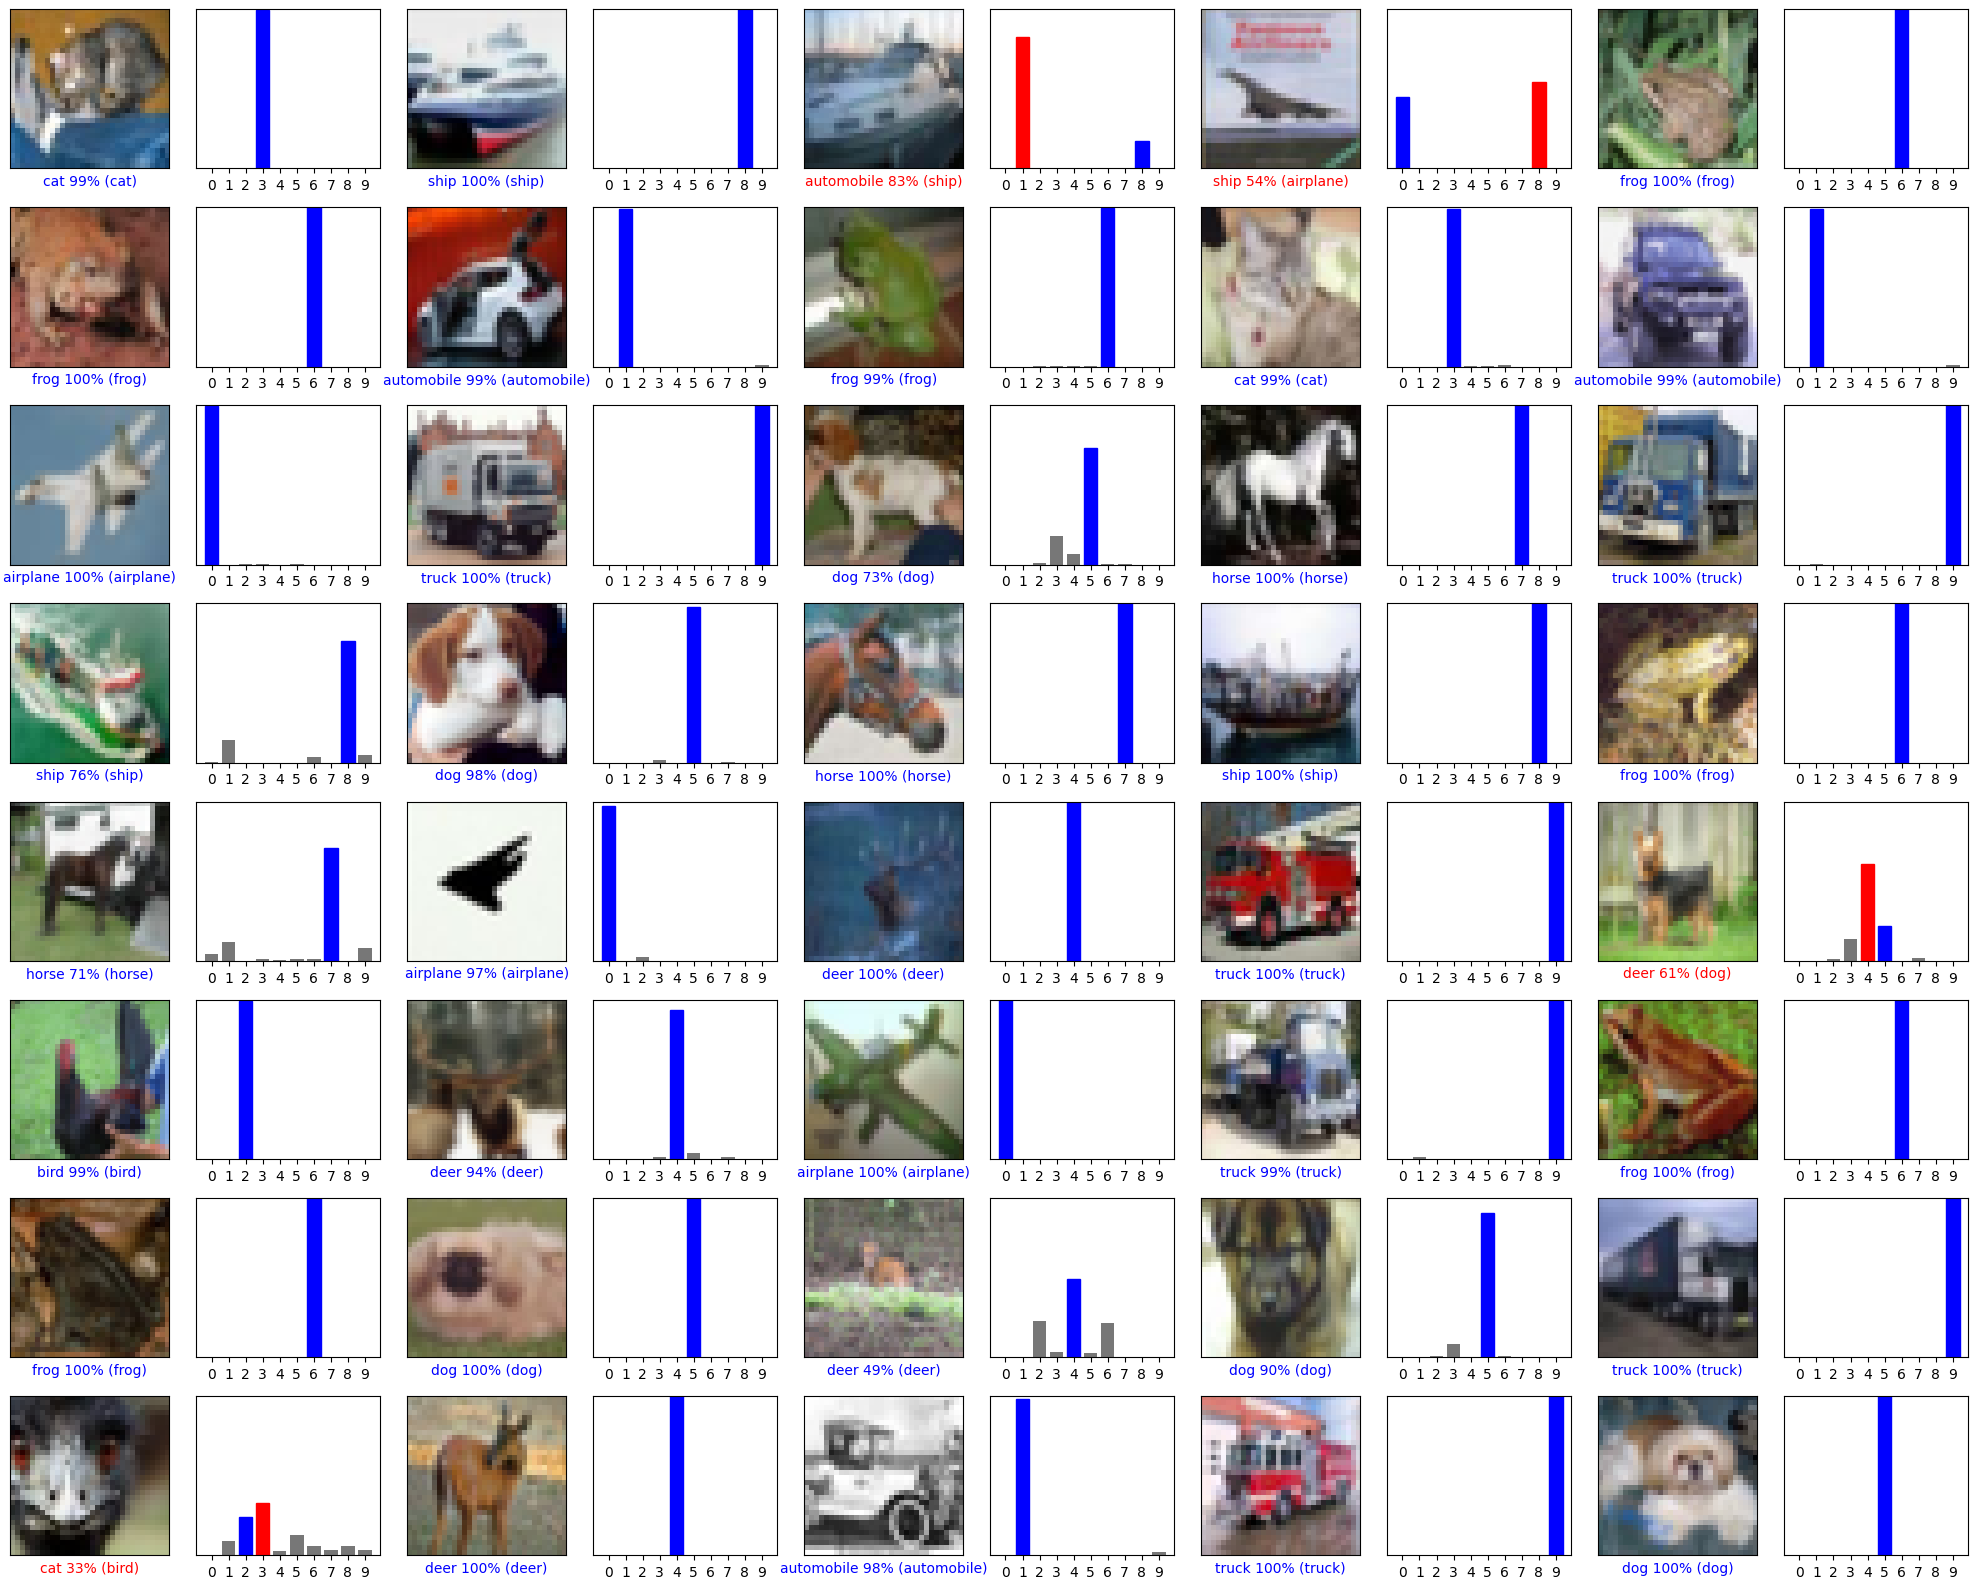

In [89]:
predictions = model.predict(x_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Comparamos ahora el rendimiento del modelo entrenado con otra técnica clásica como Random Forest:

In [90]:
from skimage.feature import hog
from skimage import exposure

def extract_hog_features(data):
    hog_features = []
    for image in data:
        # Compute HOG features for each image
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                            cells_per_block=(1, 1), visualize=True, multichannel=True)
        hog_features.append(fd)
    return hog_features

# Extraer características HOG para los conjuntos de entrenamiento y prueba
x_train_hog = extract_hog_features(x_train)
x_test_hog = extract_hog_features(x_test)

<ipython-input-90-21be911df613>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inicializar y entrenar el clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_hog, y_train)

# Predecir sobre el conjunto de prueba
y_pred_rf = rf_classifier.predict(x_test_hog)

# Calcular la precisión del modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del clasificador Random Forest:", accuracy_rf)

<ipython-input-91-ca5bf5f8173f>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train_hog, y_train)


Precisión del clasificador Random Forest: 0.4511


Vemos que hay muchísima diferencia, teniendo como accuracy el primer modelo con 75.36 y el otro modelo es de más de 87 el accuracy. La precisión del clasificador del Random Forest es de 45.

# <font color='blue'>Ejercicio 2: PROBLEMA DE ELIMINACIÓN DE RUIDO EN IMÁGENES USANDO AUTOENCODERS (3 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán al problema de eliminar ruido en imágenes. Para ello, se empleará el conjunto de datos $\textit{Fashion MNIST}$ (https://keras.io/api/datasets/fashion_mnist/), que contiene imágenes con 10 clases de ropa. En concreto, lo que haremos ahora es entrenar un modelo de aprendizaje automático conocido como autoencoder (que presenta una estructura _encoder-decoder_ y permite aprender representaciones (_embeddings_/_encodings_) altamente eficientes de forma no supervisada). Los autoencoders se emplean frecuentemente en tareas de reducción de dimensionalidad o detección de anomalías, y en este caso lo emplearemos para eliminar ruido en imágenes.

<font color='blue'> Referencias recomendadas sobre autoencoders:

*   <font color='blue'> Capítulo 14 de Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.
*   <font color='blue'> Hinton, G. E., & Salakhutdinov, R. R. (2006). Reducing the dimensionality of data with neural networks. Science, 313(5786), 504-507.

<font color='blue'> Se parte de la implementación proporcionada en la propia documentación de Keras (cuya revisión detallada se recomienda a los estudiantes). https://keras.io/examples/vision/autoencoder/



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras.datasets import fashion_mnist
from keras.models import Model


def preprocess(array):
    """Normalizes the supplied array and reshapes it."""
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array,noise_factor):
    """Adds random noise to each image in the supplied array."""
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


4422102/4422102 [==============================] - 0s 0us/step


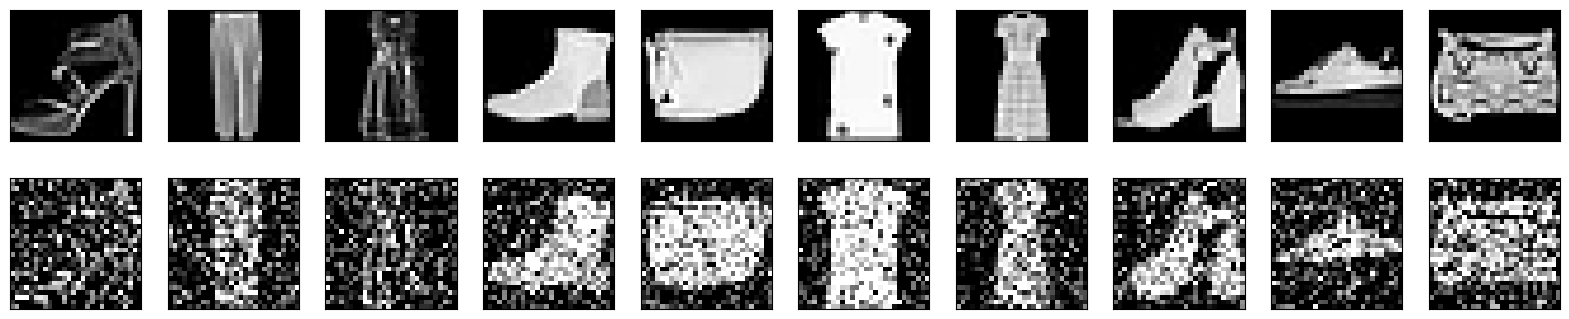

In [ ]:
(train_data, _), (test_data, _) = fashion_mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noise_factor = 0.4

noisy_train_data = noise(train_data,noise_factor)
noisy_test_data = noise(test_data,noise_factor)

display(train_data, noisy_train_data)

<font color='blue'> Se debe construir un autoencoder en el que la parte _encoder_ debe contener tres bloques convolucionales como se indica a continuación:

1.   64 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada.
2.   32 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.
3.   16 filtros de convolución $3\times3$, función de activación _ReLU_, y volumen de salida del mismo tamaño que la entrada. Este bloque convolucional va seguido por _max pooling_ de $2\times2$.



<font color='blue'> A partir de esta información, los estudiantes deben construir la parte _decoder_ simétrica (mismo número de filtros y dimensiones) y responder las siguientes preguntas:

-  <font color='blue'> ¿Qué tipo de convolución se debe emplear en el _decoder_? ¿Basta con emplear una convolución convencional 2D? Se debe justificar y desarrollar la respuesta.
-  <font color='blue'> ¿Cuál es la función de activación y función de pérdida que se debe emplear a la salida? ¿Por qué?

-  <font color='blue'> Ahora, a la hora de entrenar nuestro autoencoder, ¿cuáles serían las entradas ($X$) y salidas ($y$)? Y en relación con este punto, ¿por qué mencionábamos que los autoencoders son técnicas no supervisadas? ¿Cuáles son las etiquetas anotadas que empleamos?

1. ¿Qué tipo de convolución se debe emplear en el decoder? ¿Basta con emplear una convolución convencional 2D?
Para la parte decoder del autoencoder, se debe usar la convolución transpuesta o deconvolución (Conv2DTranspose). Sin embargo, en muchos casos, una combinación de convolución convencional 2D y UpSampling2D puede ser suficiente para restaurar la dimensión de la imagen original. En este código, usamos UpSampling2D para aumentar la resolución y luego aplicamos convoluciones 2D para refinar la imagen.

2. ¿Cuál es la función de activación y función de pérdida que se debe emplear a la salida? ¿Por qué?
La función de activación en la capa de salida es sigmoid y la función de pérdida es binary_crossentropy. La activación sigmoid se utiliza porque estamos tratando con valores de píxeles normalizados entre 0 y 1, y sigmoid es adecuada para esta tarea ya que mapea los valores a este rango. La función de pérdida binary_crossentropy es apropiada para imágenes binarizadas o escaladas entre 0 y 1, ya que mide la diferencia entre las distribuciones esperadas y predichas.

3. ¿Cuáles serían las entradas (X) y salidas (y) del autoencoder? ¿Por qué los autoencoders se consideran técnicas no supervisadas?
Las entradas (X) y salidas (y) del autoencoder son las mismas imágenes ruidosas y las imágenes originales, respectivamente. Los autoencoders se consideran técnicas no supervisadas porque no requieren etiquetas externas; aprenden a reconstruir las entradas usando solo la estructura de los datos mismos. En este caso, no estamos utilizando etiquetas anotadas como las clases de ropa, sino que estamos utilizando las propias imágenes para aprender una representación eficiente y reducir el ruido.

In [ ]:
# A CUBRIR POR EL ALUMNADO
#Build the autoencoder
input_img = layers.Input(shape=(28, 28, 1))

#Encoder
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(input_img)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)

#Decoder
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 16)        4624      
                                                             

In [ ]:
#Train the autoencoder
autoencoder.fit(noisy_train_data, train_data, epochs=50, batch_size=256, shuffle=True, validation_data=(noisy_test_data, test_data))

Epoch 1/50
235/235 [==============================] - 12s 30ms/step - loss: 0.3470 - val_loss: 0.3051
Epoch 2/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2990 - val_loss: 0.2977
Epoch 3/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2935 - val_loss: 0.2939
Epoch 4/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2906 - val_loss: 0.2925
Epoch 5/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2884 - val_loss: 0.2896
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2867 - val_loss: 0.2882
Epoch 7/50
235/235 [==============================] - 6s 23ms/step - loss: 0.2857 - val_loss: 0.2872
Epoch 8/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2846 - val_loss: 0.2868
Epoch 9/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2839 - val_loss: 0.2861
Epoch 10/50
235/235 [==============================] - 5s 23ms/step - loss: 0.2833 - val_l

313/313 [==============================] - 2s 3ms/step


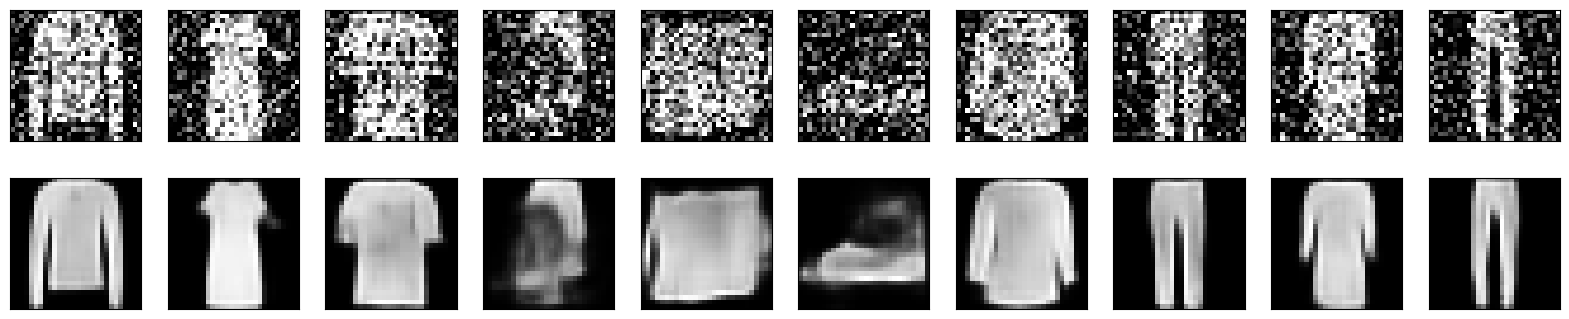

In [ ]:
#Evaluamos el autoencoder
decoded_imgs = autoencoder.predict(noisy_test_data)
display(noisy_test_data, decoded_imgs)

<font color='blue'> Ahora se debe entrenar el autoencoder empleando _early stopping_, y el número de épocas, tamaño de batch y demás hiperparámetros que se consideren adecuados (justificando siempre, eso sí, las decisiones tomadas: como es habitual, bien sea basándose en la literatura científica y documentación existentes o bien en la experimentación y evidencia empírica a nuestra disposición). En un primer momento, entrenamos con las imágenes sin ruido, para verificar que somos capaces de reconstruir adecuadamente las imágenes originales de entrada. Como conjunto de validación, en este ejercicio, podemos emplear los datos de test.

In [ ]:

# A CUBRIR POR EL ALUMNADO
from keras.callbacks import EarlyStopping
#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Train the autoencoder with early stopping
history = autoencoder.fit(train_data, train_data, epochs=100, batch_size=256, shuffle=True, validation_data=(test_data, test_data), callbacks=[early_stopping])

Epoch 1/100
235/235 [==============================] - 6s 24ms/step - loss: 0.2594 - val_loss: 0.2592
Epoch 2/100
235/235 [==============================] - 6s 25ms/step - loss: 0.2568 - val_loss: 0.2580
Epoch 3/100
235/235 [==============================] - 6s 24ms/step - loss: 0.2557 - val_loss: 0.2573
Epoch 4/100
235/235 [==============================] - 6s 26ms/step - loss: 0.2551 - val_loss: 0.2570
Epoch 5/100
235/235 [==============================] - 6s 25ms/step - loss: 0.2545 - val_loss: 0.2562
Epoch 6/100
235/235 [==============================] - 6s 24ms/step - loss: 0.2541 - val_loss: 0.2563
Epoch 7/100
235/235 [==============================] - 5s 23ms/step - loss: 0.2537 - val_loss: 0.2568
Epoch 8/100
235/235 [==============================] - 5s 23ms/step - loss: 0.2534 - val_loss: 0.2561
Epoch 9/100
235/235 [==============================] - 5s 23ms/step - loss: 0.2531 - val_loss: 0.2549
Epoch 10/100
235/235 [==============================] - 5s 23ms/step - loss: 0.252

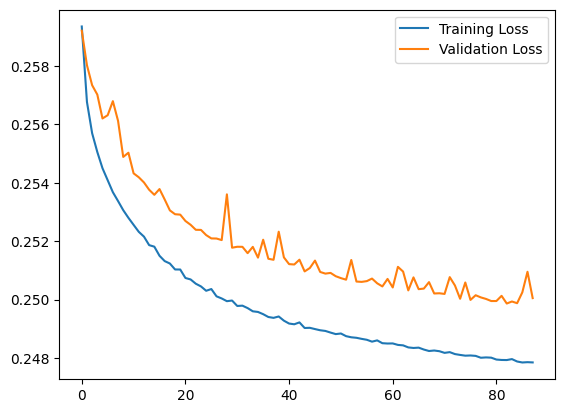

In [ ]:
#Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


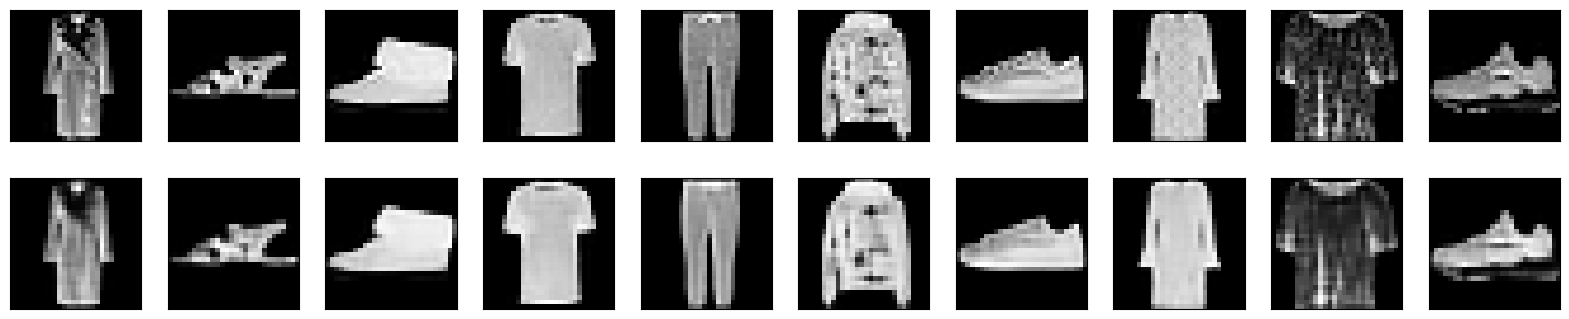

In [ ]:
#Evaluate the autoencoder
decoded_imgs = autoencoder.predict(test_data)
display(test_data, decoded_imgs)

Número de épocas: Se selecciona un número suficientemente alto, como 100, para permitir que el modelo se entrene completamente. Sin embargo, el early stopping detendrá el entrenamiento antes si no hay mejora en el rendimiento del modelo.
Tamaño del batch: Se elige 256 para mantener un equilibrio entre la estabilidad de la actualización de los pesos y la eficiencia computacional.
Optimizador: Se utiliza Adam, ya que es un optimizador robusto y eficiente que ajusta las tasas de aprendizaje automáticamente.
Función de pérdida: binary_crossentropy es adecuada para los valores de píxeles normalizados entre 0 y 1.

<font color='blue'> Ahora vamos a entrenar con las imágenes ruidosas a la entrada y las imágenes sin ruido a la salida. Nuestro propósito es crear un modelo que permita reconstruir a la salida las imágenes sin ruido. Se deben discutir los resultados obtenidos, así como si se percibe alguna diferencia entre las curvas de entrenamiento cuando se emplean imágenes con y sin ruido.

In [ ]:
# A CUBRIR POR EL ALUMNADO
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder with noisy images as input and clean images as output
history = autoencoder.fit(noisy_train_data, train_data,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(noisy_test_data, test_data),
                          callbacks=[early_stopping])


Epoch 1/100
235/235 [==============================] - 6s 25ms/step - loss: 0.3030 - val_loss: 0.2929
Epoch 2/100
235/235 [==============================] - 6s 26ms/step - loss: 0.2889 - val_loss: 0.2896
Epoch 3/100
235/235 [==============================] - 6s 24ms/step - loss: 0.2864 - val_loss: 0.2876
Epoch 4/100
235/235 [==============================] - 6s 23ms/step - loss: 0.2849 - val_loss: 0.2867
Epoch 5/100
235/235 [==============================] - 6s 24ms/step - loss: 0.2839 - val_loss: 0.2856
Epoch 6/100
235/235 [==============================] - 5s 23ms/step - loss: 0.2832 - val_loss: 0.2852
Epoch 7/100
235/235 [==============================] - 5s 23ms/step - loss: 0.2826 - val_loss: 0.2845
Epoch 8/100
235/235 [==============================] - 5s 23ms/step - loss: 0.2821 - val_loss: 0.2840
Epoch 9/100
235/235 [==============================] - 5s 22ms/step - loss: 0.2816 - val_loss: 0.2836
Epoch 10/100
235/235 [==============================] - 5s 23ms/step - loss: 0.281

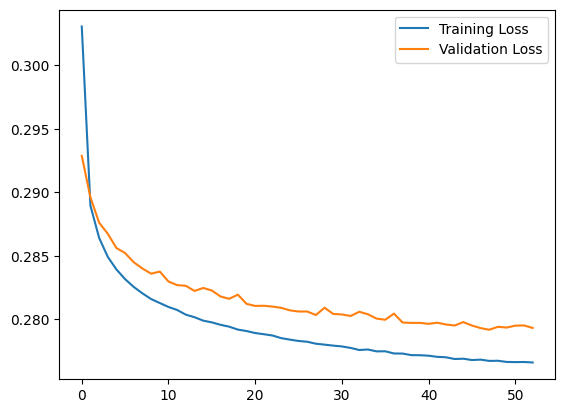

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


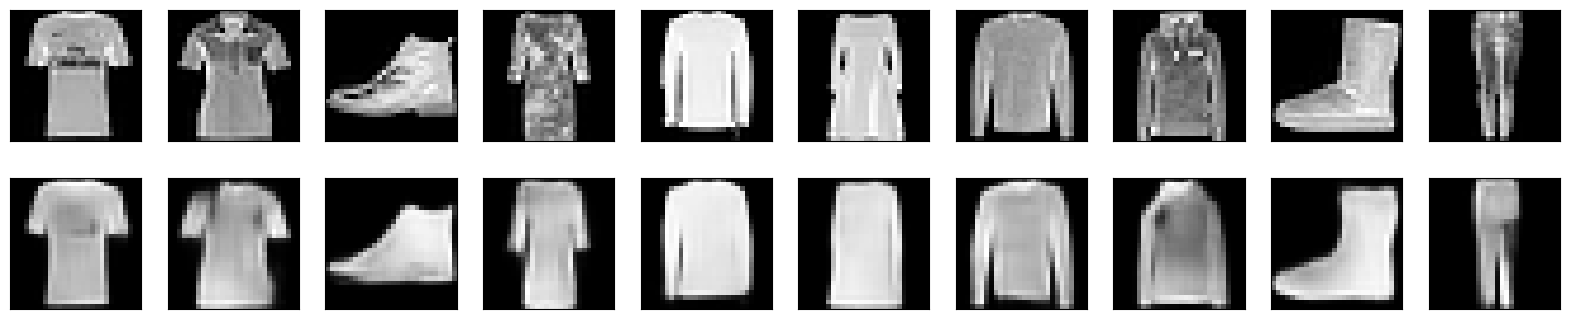

In [ ]:
# Evaluate the autoencoder
decoded_imgs = autoencoder.predict(noisy_test_data)
display(test_data, decoded_imgs)

Discusión de los Resultados
Curvas de Entrenamiento y Validación:

Las curvas de pérdida durante el entrenamiento y la validación muestran cómo el modelo mejora su capacidad para eliminar el ruido de las imágenes a lo largo de las épocas.
Es probable que al principio, la pérdida disminuya rápidamente a medida que el modelo aprende las representaciones básicas para la eliminación de ruido.
Con el tiempo, la disminución de la pérdida puede ralentizarse, y el early stopping detendrá el entrenamiento cuando la pérdida de validación deje de mejorar.
Diferencias entre el Entrenamiento con Imágenes Ruidosas y Sin Ruido:

Cuando se entrenó el autoencoder con imágenes sin ruido, el objetivo era reconstruir las mismas imágenes, por lo que las curvas de pérdida deberían haber mostrado una convergencia suave.
Al entrenar con imágenes ruidosas, la tarea es más desafiante, ya que el modelo debe aprender a eliminar el ruido y reconstruir las imágenes originales. Las curvas de pérdida pueden mostrar más fluctuaciones inicialmente mientras el modelo se ajusta a esta tarea más compleja.
Al observar las imágenes reconstruidas, deberíamos notar que el autoencoder es capaz de eliminar gran parte del ruido, produciendo imágenes más claras y nítidas.
Resultados y Calidad de la Reconstrucción:

La calidad de las imágenes reconstruidas se puede evaluar visualmente comparando las imágenes ruidosas con las imágenes reconstruidas y las originales.
Idealmente, las imágenes reconstruidas deberían parecerse mucho a las imágenes originales sin ruido, indicando que el autoencoder ha aprendido efectivamente a eliminar el ruido.
La efectividad del autoencoder se puede juzgar por la claridad y precisión de las características de la ropa en las imágenes reconstruidas.
En resumen, el entrenamiento de un autoencoder para la eliminación de ruido en imágenes implica una tarea más compleja que la simple reconstrucción de imágenes, pero es factible con una arquitectura adecuada y un entrenamiento cuidadoso. Las imágenes reconstruidas proporcionan una buena indicación de cómo el modelo está aprendiendo y cómo se desempeña en la tarea de eliminación de ruido.

<font color='blue'> Finalmente, se deben realizar dos experimentos.  

1.   Por un lado, probar con distintos `noise_factor` progresivamente más severos de ruido, para comprobar si hay algún límite (_breakpoint_) a partir del cual la reconstrucción de las imágenes ruidosas se resiente. En otras palabras, queremos estudiar hasta qué grado de ruidosidad podemos reconstruir nuestras imágenes contaminadas con ruido.
2.   Por otro lado, debemos investigar si el autoencoder entrenado generaliza y permite reconstruir imágenes en presencia de ruido diferente. Sin realizar ningún otro entrenamiento, y empleando el autoencoder ya entrenado, ¿podemos reconstruir las imágenes contaminadas con este otro tipo de ruido? Para simular dicho ruido se debe emplear la función que se proporciona más abajo (`noise2()`), aunque se da libertad al alumnado para experimentar también con otros tipos de ruido. ¿Qué conclusiones se pueden extraer de este experimento?



In [ ]:
def noise2(image, noise_factor):
    noisy_array = image.copy()
    probs = np.random.random(noisy_array.shape[:2])
    noisy_array[probs < noise_factor/2] = 0.0
    noisy_array[probs > 1 - (noise_factor/2)] = 1.0
    return np.clip(noisy_array, 0.0, 1.0)

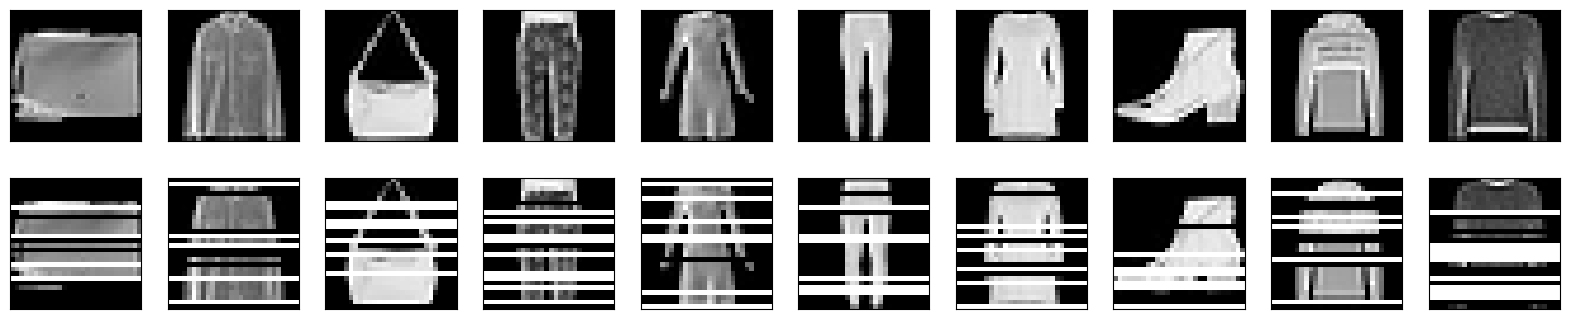

In [ ]:
noise_factor = 0.4

noisy_test_data = noise2(test_data,noise_factor)

display(test_data, noisy_test_data)

313/313 [==============================] - 2s 5ms/step
Noise Factor: 0.1


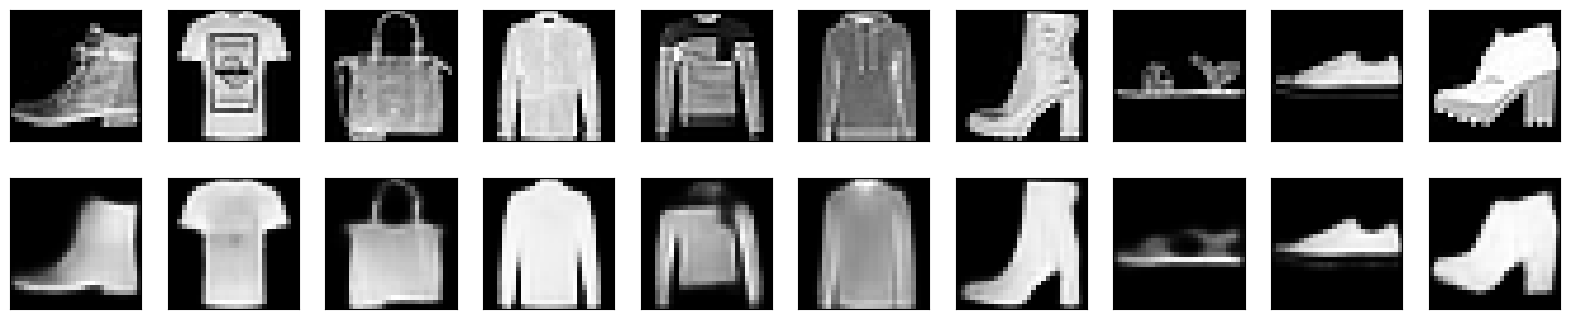

313/313 [==============================] - 1s 5ms/step
Noise Factor: 0.2


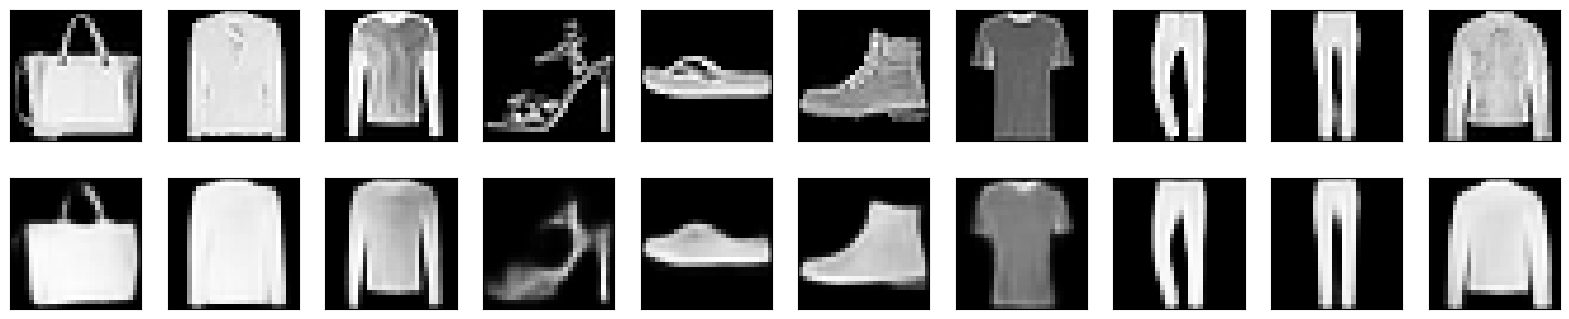

313/313 [==============================] - 1s 2ms/step
Noise Factor: 0.3


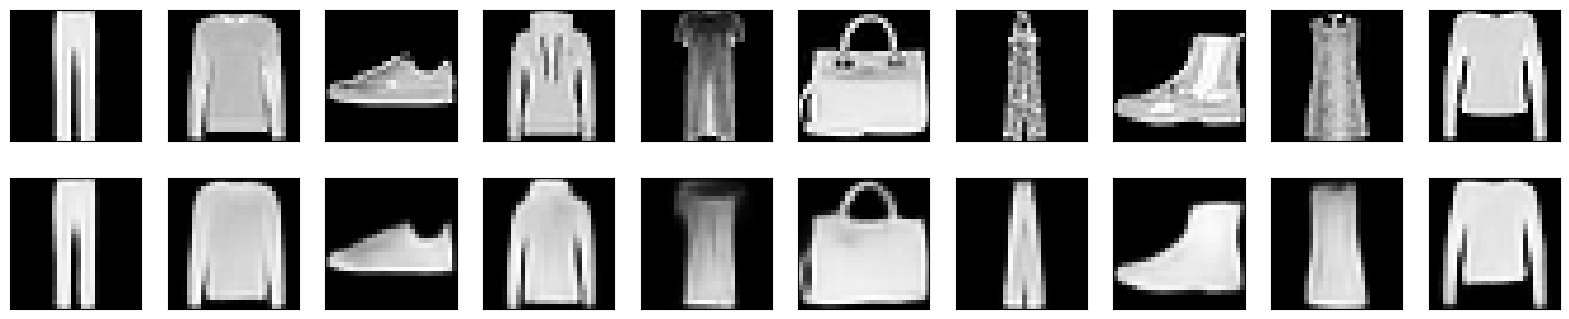

313/313 [==============================] - 1s 2ms/step
Noise Factor: 0.4


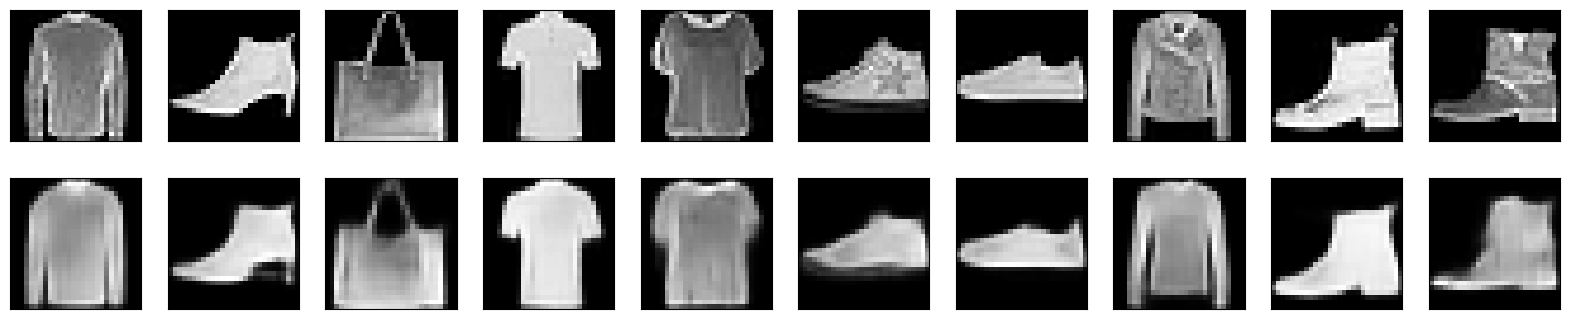

313/313 [==============================] - 1s 2ms/step
Noise Factor: 0.5


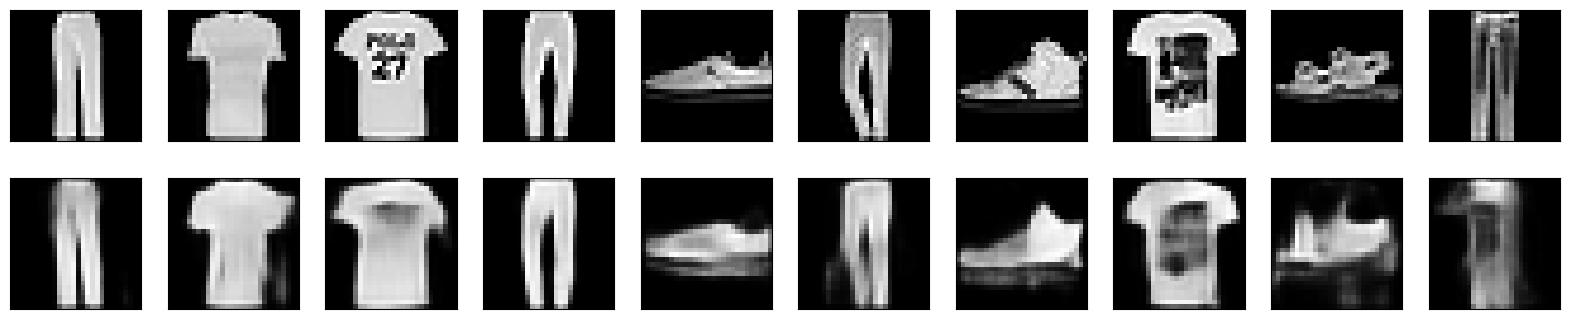

313/313 [==============================] - 1s 2ms/step
Noise Factor: 0.6


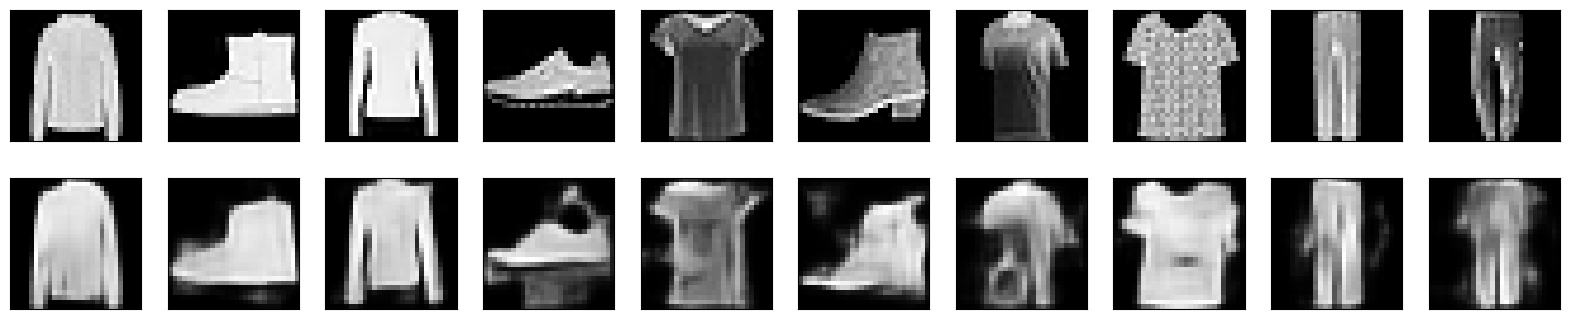

313/313 [==============================] - 1s 2ms/step
Noise Factor: 0.7


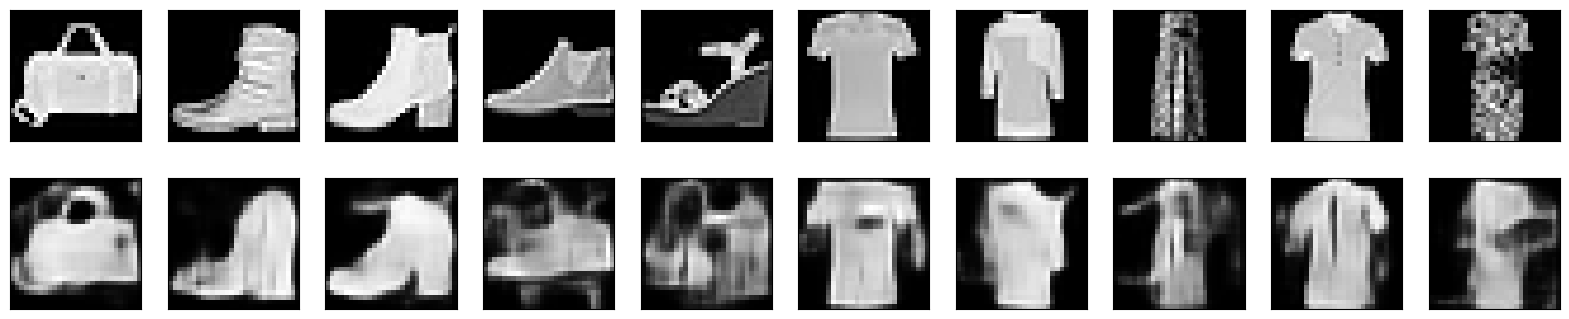

313/313 [==============================] - 1s 3ms/step
Noise Factor: 0.8


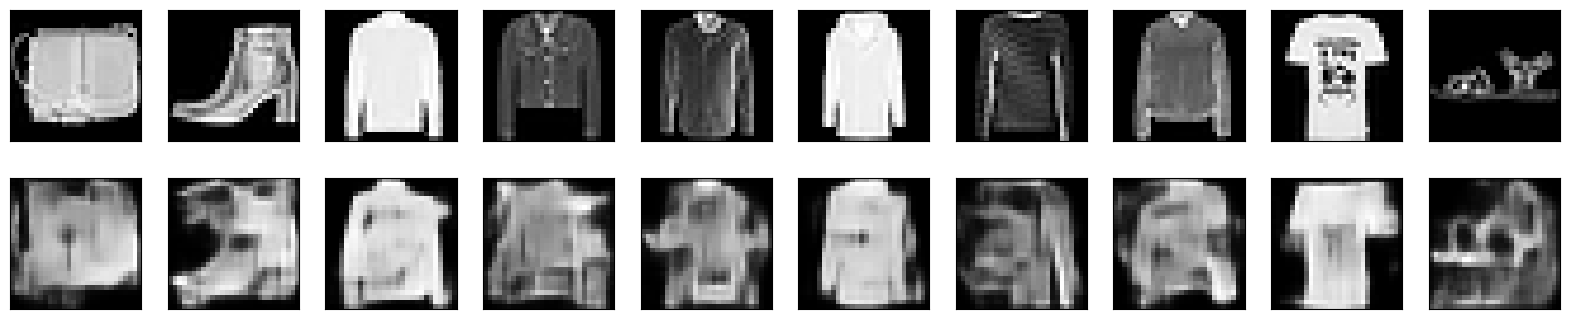

In [ ]:
# A CUBRIR POR EL ALUMNADO
#Experimento 1
noise_factors = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for nf in noise_factors:
  noisy_test_data = noise(test_data, nf)
  decoded_imgs = autoencoder.predict(noisy_test_data)

  print(f"Noise Factor: {nf}")
  display(test_data, decoded_imgs)

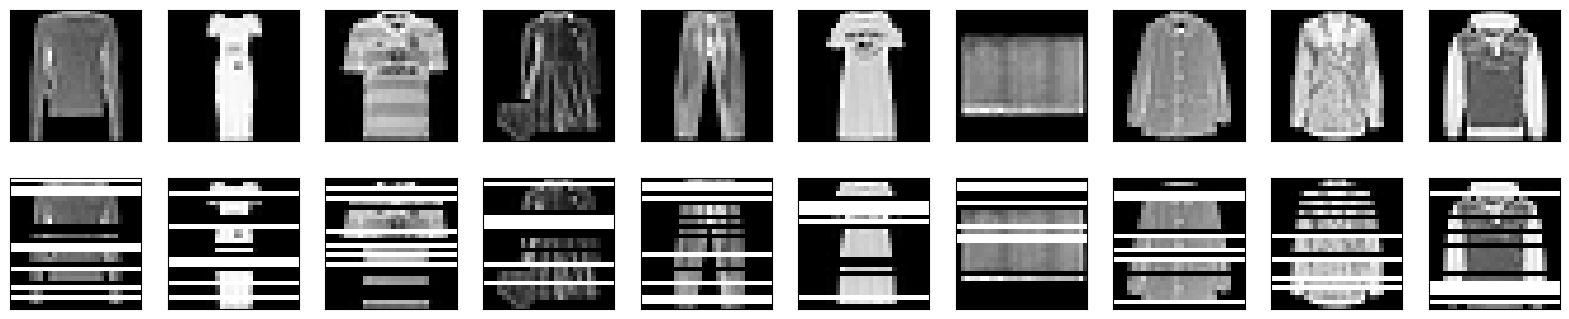

313/313 [==============================] - 1s 2ms/step


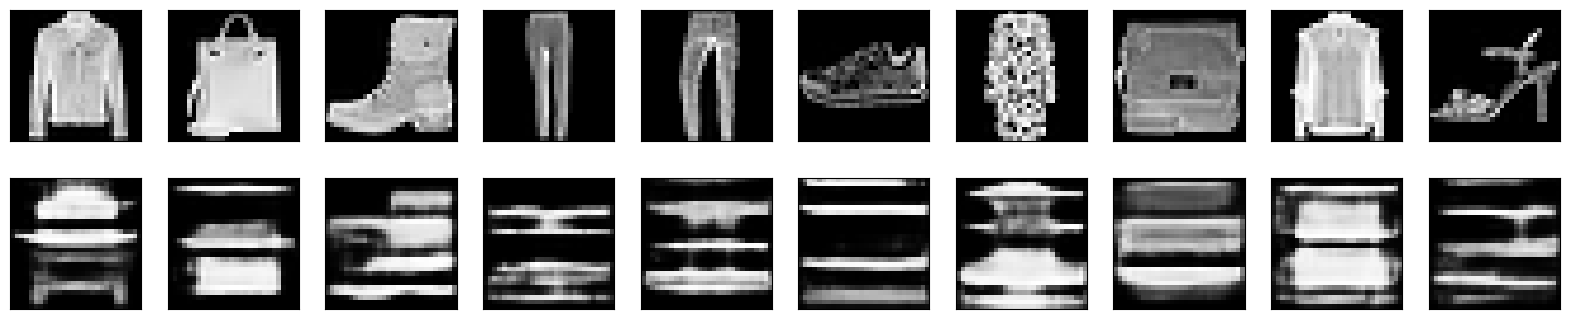

In [ ]:
# Generar ruido con la nueva función noise2
noise_factor = 0.4
noisy_test_data_2 = noise2(test_data, noise_factor)

# Visualizar las imágenes originales y las imágenes con el nuevo tipo de ruido
display(test_data, noisy_test_data_2)

# Evaluar el autoencoder entrenado con el nuevo tipo de ruido
decoded_imgs_2 = autoencoder.predict(noisy_test_data_2)

# Visualizar las imágenes reconstruidas
display(test_data, decoded_imgs_2)

Resultados del Experimento 1:
Con noise_factor bajos (0.1 a 0.3), el autoencoder debería ser capaz de reconstruir las imágenes casi a la perfección.
A medida que incrementamos el noise_factor, la calidad de la reconstrucción puede comenzar a degradarse.
En niveles de ruido muy altos (0.6 a 0.8), es probable que la capacidad del autoencoder para reconstruir las imágenes de manera efectiva disminuya significativamente, indicando el punto de ruptura.

Resultados del Experimento 2:
La calidad de la reconstrucción con el nuevo tipo de ruido (noise2) dependerá de cuánto difiera este ruido del ruido gaussian habitual.
Si el autoencoder puede eliminar eficazmente el ruido de tipo noise2, esto indicaría una buena capacidad de generalización del modelo.
Si la calidad de la reconstrucción es significativamente peor con noise2, esto sugeriría que el autoencoder está especializado en eliminar ruido gaussian, y podría no generalizar bien a otros tipos de ruido sin entrenamiento adicional.
Conclusiones
Evaluación con Diferentes Niveles de Ruido:
Se observará una disminución gradual en la calidad de la reconstrucción a medida que aumenta el nivel de ruido.
Identificar un punto de ruptura ayuda a comprender los límites del autoencoder y hasta qué nivel de ruido puede manejar de manera efectiva.
Generalización a Diferentes Tipos de Ruido:
La capacidad del autoencoder para manejar ruido de tipo noise2 proporciona información sobre su flexibilidad y robustez.
Un rendimiento deficiente con el nuevo tipo de ruido puede indicar la necesidad de entrenar el modelo con una variedad más amplia de ruidos para mejorar su capacidad de generalización.